<a href="https://colab.research.google.com/github/tomilolaoke/Dissertation/blob/main/Prediction_of_Life_Expectancy_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Life Expectancy using Supervised Machine Learning models with Selected Features





In [1]:
#Import necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics, preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from plotly.subplots import make_subplots
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
#Read dataset
data = pd.read_csv('/content/world-data-2023 (1).csv')
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:
#[1] https://www.kaggle.com/code/dmitriyvishnyakov/unemployment-rate-prediction
# List of features with object data type
object_list = [x for x in data.columns if data[x].dtype == 'object']

# List of features in which the '%' sign is indicated
object_list_percent = [x for x in object_list if '%' in x]+(['Out of pocket health expenditure', 'Total tax rate', 'Unemployment rate'])
print(object_list_percent)

# Remove the '%' sign and change the data type to float
for feature in data.columns:
    if feature in object_list_percent:
        data[feature] = data[feature].str.replace('%', '')
        data[feature] = data[feature].str.strip()
        data[feature] = data[feature].astype('float64')

['Agricultural Land( %)', 'CPI Change (%)', 'Forested Area (%)', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Out of pocket health expenditure', 'Total tax rate', 'Unemployment rate']


In [4]:
# List of features with object data type
object_list = [x for x in data.columns if data[x].dtype == 'object']
object_list

['Country',
 'Density\n(P/Km2)',
 'Abbreviation',
 'Land Area(Km2)',
 'Armed Forces size',
 'Capital/Major City',
 'Co2-Emissions',
 'CPI',
 'Currency-Code',
 'Gasoline Price',
 'GDP',
 'Largest city',
 'Minimum wage',
 'Official language',
 'Population',
 'Urban_population']

In [5]:
#[1]
# List of features to be transformed
columns_list = ['Density\n(P/Km2)', 'Land Area(Km2)', 'Armed Forces size', 'Co2-Emissions', 'CPI',
           'Gasoline Price', 'GDP', 'Minimum wage', 'Population', 'Urban_population']

# Remove ',' and '$'
for feature in data.columns:
    if feature in columns_list:
        data[feature] = data[feature].str.replace(',', '')
        data[feature] = data[feature].str.replace('$', '')

# Replacing data types with int and float
float_list = ['CPI', 'Gasoline Price', 'Minimum wage']
int_list = ['Density\n(P/Km2)', 'Land Area(Km2)', 'Armed Forces size', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']
for feature in data.columns:
    if feature in float_list:
        data[feature] = data[feature].astype('float64')
    elif feature in int_list:
        data[feature] = data[feature].astype('Int64')

In [6]:
#[1]
# Estimate percentage of Missing values
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
cols = list(cols_with_null.index)
display(cols_with_null)

,0
Minimum wage,23.076923
Tax revenue (%),13.333333
Armed Forces size,12.307692
Gasoline Price,10.256410
Unemployment rate,9.743590
Population: Labor force participation (%),9.743590
CPI,8.717949
CPI Change (%),8.205128
Currency-Code,7.692308
Maternal mortality ratio,7.179487


In [7]:
#Extract all categorical variables
cat_list = [x for x in data.columns if data[x].dtype == 'object']
cat_list

['Country',
 'Abbreviation',
 'Capital/Major City',
 'Currency-Code',
 'Largest city',
 'Official language']

In [8]:
#[1]
#Impute unknown for missing categorical variables
data[cat_list] = data[cat_list].fillna('unknown')
#impute 0 to fill nas
data = data.fillna(0)
data.isnull().sum()

,0
Country,0
Density\n(P/Km2),0
Abbreviation,0
Agricultural Land( %),0
Land Area(Km2),0
Armed Forces size,0
Birth Rate,0
Calling Code,0
Capital/Major City,0
Co2-Emissions,0


Descriptive statistics

In [9]:
#Generate summary of variables
descr_stats=data.describe()
descr_stats


,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195.0,195.000000,195.0,195.0,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000
mean,356.764103,37.713333,686087.830769,139671.794872,19.592974,358.697436,171416.702564,173.856667,6.170769,2.601282,...,31.465641,1.773795,39179209.323077,56.625128,14.364103,38.310256,6.215385,21732631.851282,18.994442,20.128678
std,1982.888967,22.596702,1917286.358734,360149.002633,10.397534,323.434462,824185.848501,383.909718,23.493382,1.355777,...,19.783417,1.688826,144745434.615178,21.152722,8.595080,22.208406,5.240580,74535966.752995,23.939018,66.559711
min,2.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,-4.300000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-40.900557,-175.198242
25%,35.5,19.800000,23083.0,4500.0,10.675000,81.500000,1901.5,111.005000,0.650000,1.625000,...,15.700000,0.245000,1916855.5,52.900000,9.500000,28.500000,2.555000,950418.0,4.372880,-7.658537
50%,89.0,39.200000,118484.0,23000.0,17.800000,255.000000,10715.0,121.640000,2.100000,2.200000,...,28.400000,1.300000,8776109.0,61.600000,14.700000,36.600000,4.670000,4359150.0,17.189877,20.939444
75%,216.5,54.850000,520544.0,123000.0,28.445000,506.500000,61941.0,155.605000,3.750000,3.565000,...,43.750000,2.875000,28562269.5,68.300000,20.300000,47.300000,8.840000,14601389.5,40.106102,48.046657
max,26337.0,82.600000,17098240.0,3031000.0,46.080000,1876.000000,9893038.0,4583.710000,254.900000,6.910000,...,81.600000,8.420000,1397715000.0,86.800000,37.200000,219.600000,28.180000,842933962.0,64.963051,178.065032


In [10]:
#Save table
from google.colab import files
descr_stats.to_csv('descriptive stat.csv')
#files.download('descriptive stat.csv')

# Exploratory Data Analysis

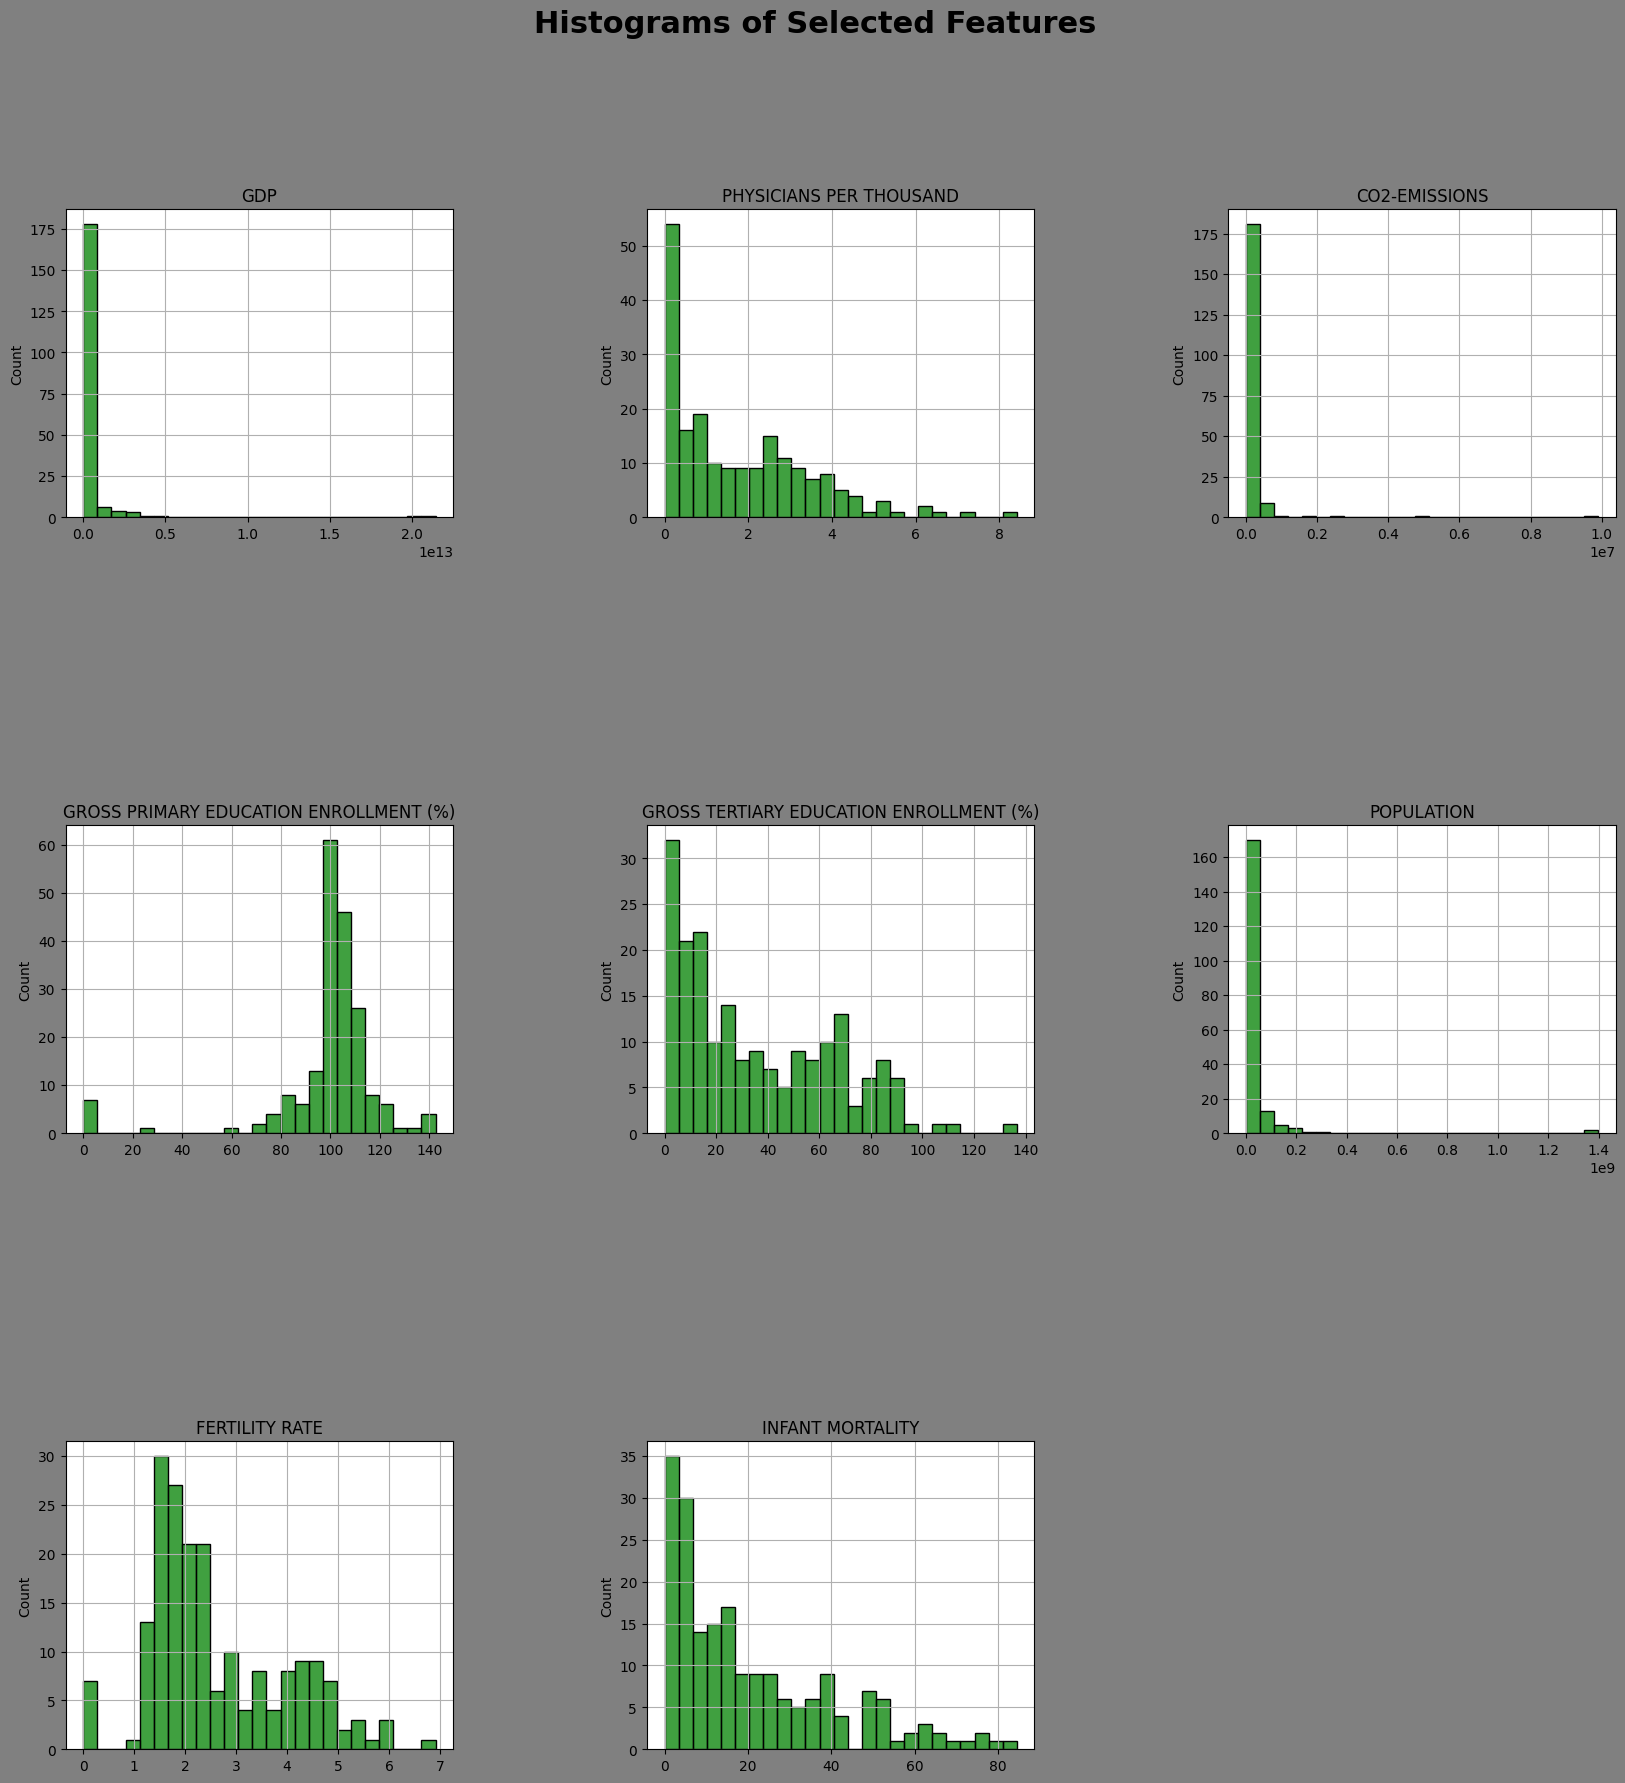

In [11]:
#[1]
# List of selected features to plot against Life expectancy
features = ['GDP', 'Physicians per thousand', 'Co2-Emissions','Gross primary education enrollment (%)',
'Gross tertiary education enrollment (%)','Population', 'Fertility Rate', 'Infant mortality']
# Assuming 'quality_of_life' is the target variable
target_variable = 'Life expectancy'

#Number of socioeconomic and environmental features
n = len(features)



# Create subplots - adjust the number of rows and columns based on the number of features
fig, axes = plt.subplots(nrows=(n // 3) + (n % 3 > 0), ncols=3, figsize=(20, 20), facecolor='gray')
plt.subplots_adjust(hspace=1.0, wspace=0.5)
plt.suptitle('Histograms of Selected Features', fontsize=22, fontweight='bold')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for the features
for i, (col, ax) in enumerate(zip(features, axes)):
    sns.histplot(data, x=col, color='green', ax=ax, bins=25)
    ax.set_title(col.upper())
    ax.set_xlabel('')
    ax.grid()

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

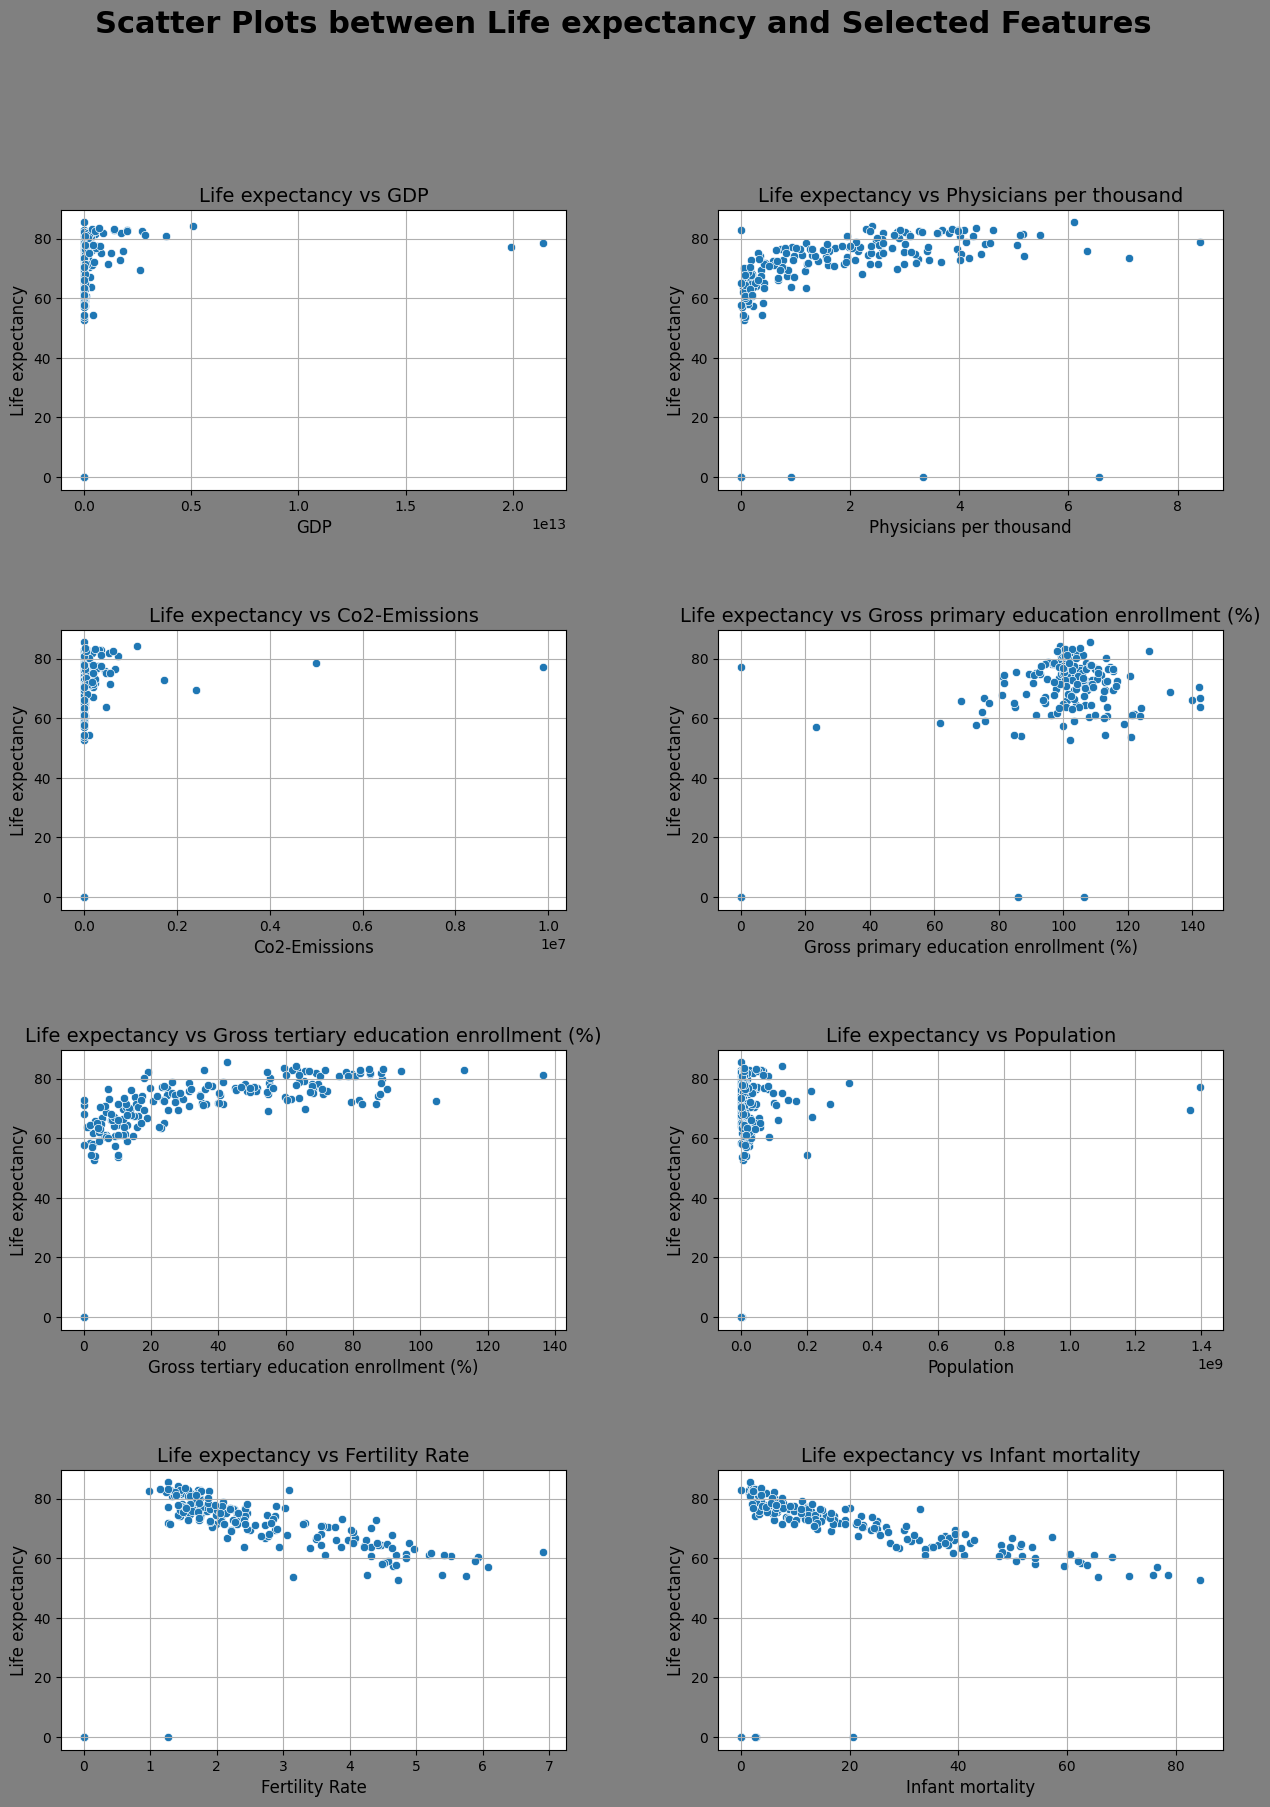

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected features to plot against Life expectancy
features = ['GDP', 'Physicians per thousand', 'Co2-Emissions','Gross primary education enrollment (%)',
'Gross tertiary education enrollment (%)','Population', 'Fertility Rate', 'Infant mortality']
# Assuming 'quality_of_life' is the target variable
target_variable = 'Life expectancy'

#Number of socioeconomic and environmental features
n = len(features)

#Create subplots
fig, axes = plt.subplots(nrows=(n // 2) + (n % 2 > 0), ncols=2, figsize=(15, 20), facecolor='gray')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Scatter Plots between Life expectancy and Selected Features', fontsize=22, fontweight='bold')

#Flatten axes for iteration
axes = axes.flatten()

# Plot scatter plots for the features against Life expectancy
for i, (col, ax) in enumerate(zip(features, axes)):
    sns.scatterplot(data=data, x=col, y=target_variable, ax=ax)
    ax.set_title(f'{target_variable} vs {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel(target_variable, fontsize=12)
    ax.grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


We observed an increasing pattern between Life expectancy and Gross tertiary education enrollment and life  and a decreasing pattern between life expectancy and fertility rate , life expectancy and Infant mortality.

In [13]:
emissions=data[['Country','Co2-Emissions']]
emissions=pd.DataFrame(emissions)

In [14]:
sorted_emissions=emissions.sort_values(by='Co2-Emissions', ascending=False)
sorted_emissions

,Country,Co2-Emissions
36,China,9893038
186,United States,5006302
77,India,2407672
143,Russia,1732027
85,Japan,1135886
...,...,...
113,Monaco,0
120,Nauru,0
73,Vatican City,0
128,North Macedonia,0


In [15]:
#pie chart of percentage emission 10 large emitters labelled by country
top_20emitters=sorted_emissions.iloc[:20]
top_20emitters

,Country,Co2-Emissions
36,China,9893038
186,United States,5006302
77,India,2407672
143,Russia,1732027
85,Japan,1135886
64,Germany,727973
79,Iran,661710
162,South Korea,620302
151,Saudi Arabia,563449
78,Indonesia,563325


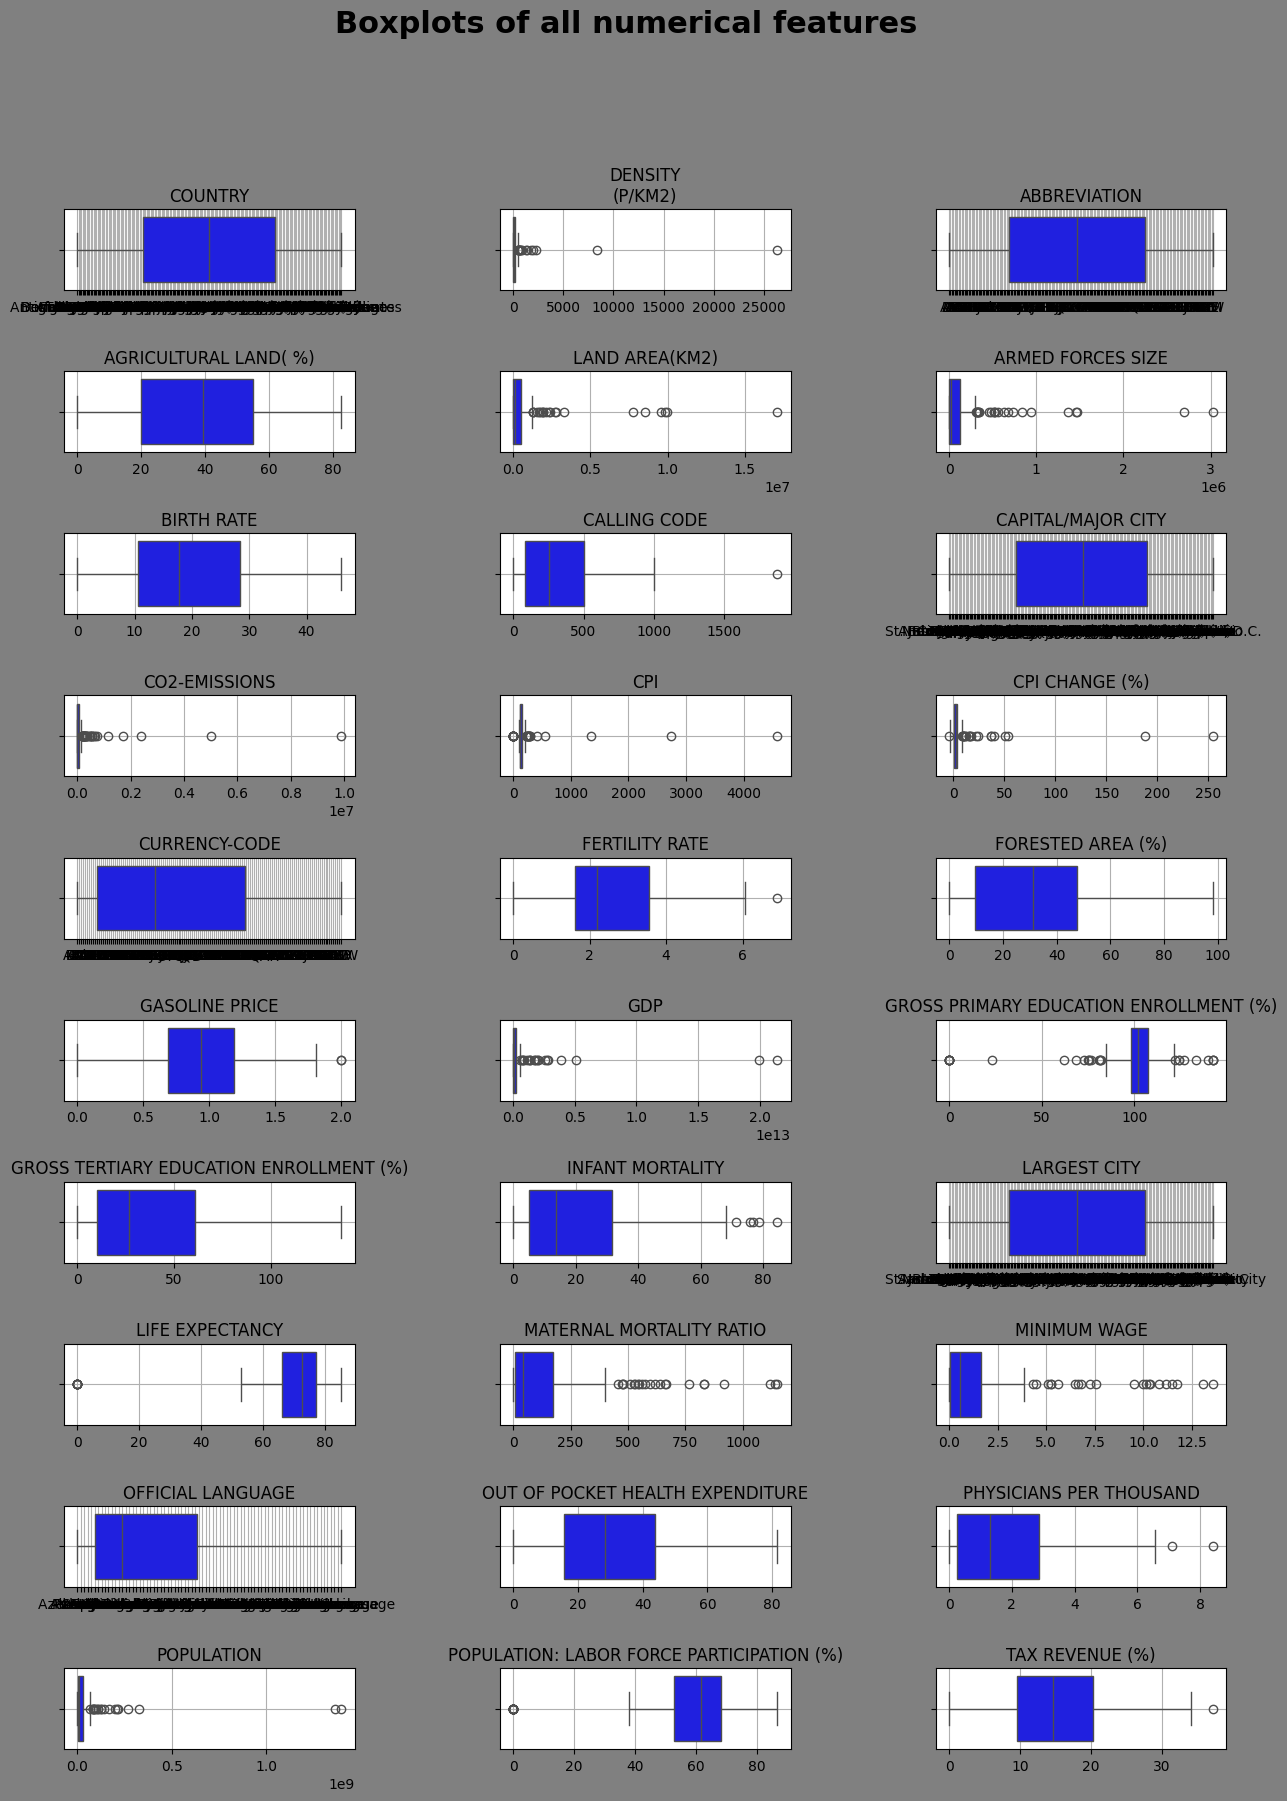

In [16]:
#BOXPLOTS OF NUMERICAL VARIABLES
fig, axes = plt.subplots(10, 3, figsize=(15, 20), facecolor='gray')
plt.subplots_adjust(hspace=1.0, wspace=0.5)
plt.suptitle('Boxplots of all numerical features',
             fontsize=22,
             fontweight='bold')
for col, ax in zip(data, axes.ravel()):
    histplot = sns.boxplot(data,
                            x=col,
                            color='blue',
                            ax=ax)
    histplot.set_title(col.upper())
    histplot.set_xlabel('')
    ax.grid()

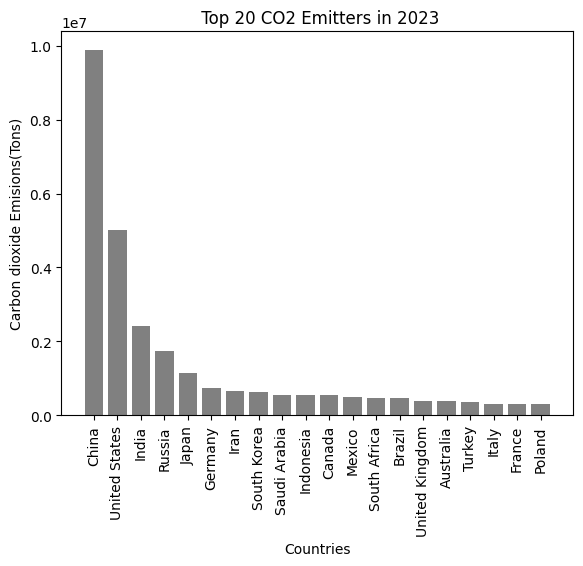

In [17]:
fig=plt.figure()
ax=fig.add_axes([20,20,.8,.8])
#color=['blue','purple','red','olive','gray','pink','brown','orange','lime','black']
ax.bar(top_20emitters['Country'],top_20emitters['Co2-Emissions'], color='grey')
ax.set(xlabel='Countries', ylabel="Carbon dioxide Emisions(Tons)", title=' Top 20 CO2 Emitters in 2023')
plt.xticks(rotation=90)
plt.show()
#plt.savefig('Top 20 CO2 Emitters in 2023')

In [18]:
from scipy.stats import trim_mean
trim_Em=trim_mean(data['Co2-Emissions'],0.1)
trim_pop=trim_mean(data['Population'],0.1)

print('The trimmed mean for emission is:',trim_Em,'and for Population is:', trim_pop)

The trimmed mean for emission is: 40709.579617834395 and for Population is: 14833712.592356687


In [19]:
from pylab import rcParams

In [20]:
#pie chart of percentage emission 10 large emitters labelled by country
top_10emitters=sorted_emissions.iloc[:10]
top_10emitters

,Country,Co2-Emissions
36,China,9893038
186,United States,5006302
77,India,2407672
143,Russia,1732027
85,Japan,1135886
64,Germany,727973
79,Iran,661710
162,South Korea,620302
151,Saudi Arabia,563449
78,Indonesia,563325


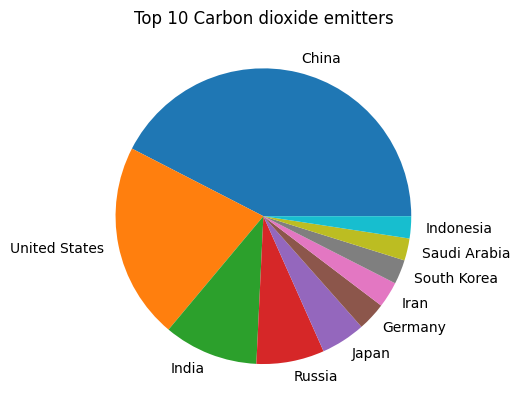

In [21]:
#piechart
#color_theme =['#A9A9A9','#FFA07A', '#B0E0E6','#FFE4C4','#BDB76B','red','darkblue','#8EB897','#17becf','green']
plt.pie(top_10emitters['Co2-Emissions'], labels=top_10emitters['Country'])
plt.title('Top 10 Carbon dioxide emitters')
plt.show()

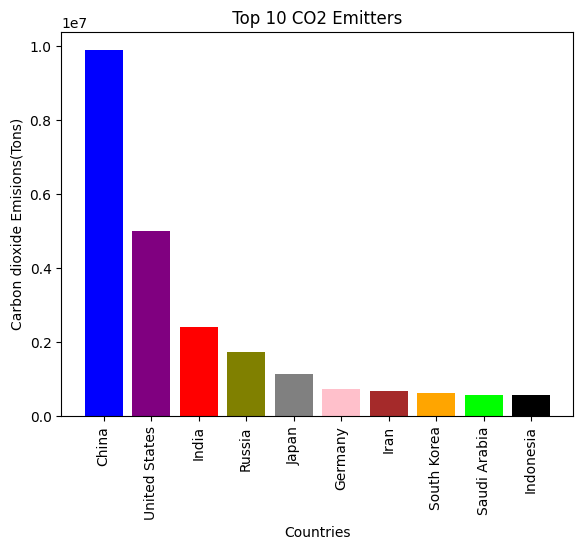

In [22]:
fig=plt.figure()
ax=fig.add_axes([10,10,.8,.8])
color=['blue','purple','red','olive','gray','pink','brown','orange','lime','black']
ax.bar(top_10emitters['Country'],top_10emitters['Co2-Emissions'],color=color)
ax.set(xlabel='Countries', ylabel="Carbon dioxide Emisions(Tons)", title=' Top 10 CO2 Emitters ')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Life expectancy'>

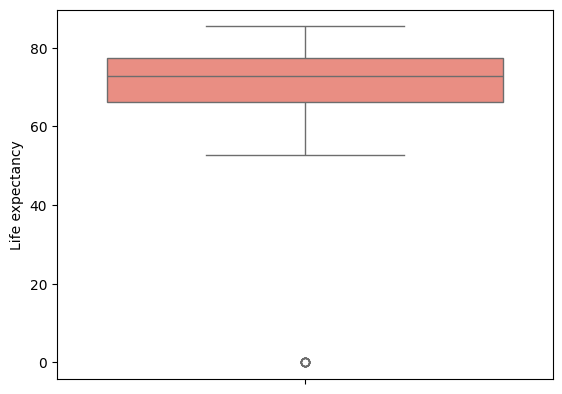

In [23]:
sns.boxplot(data=data["Life expectancy"], color='salmon')

Text(0.5, 1.0, 'Barplot of Life expectancy')

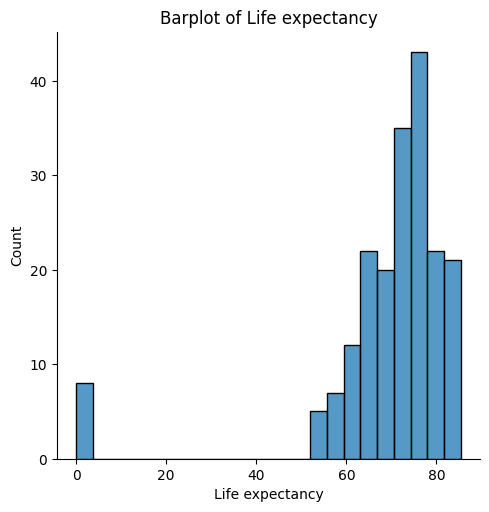

In [24]:
life=data['Life expectancy']
sns.displot(life)

plt.title('Barplot of Life expectancy')
#plt.savefig

In [25]:
#[1] #https://www.kaggle.com/code/dmitriyvishnyakov/unemployment-rate-prediction
#Encode categorical features
for feature in cat_list:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])

In [26]:
#List variable names
data.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [27]:
#Selecting 8 socio-economic, health-related and environmental features
socio_economic_features = ['GDP','Physicians per thousand','Tax revenue (%)','Infant mortality','Life expectancy','Co2-Emissions','Gross primary education enrollment (%)',
'Gross tertiary education enrollment (%)','Population', 'Fertility Rate', 'Infant mortality']
socio_economic_features=data[socio_economic_features]

In [28]:
#Estmate correlation between variables
feat_cormat=socio_economic_features.corr()
feat_cormat

,GDP,Physicians per thousand,Tax revenue (%),Infant mortality,Life expectancy,Co2-Emissions,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Population,Fertility Rate,Infant mortality
GDP,1.000000,0.098378,-0.037143,-0.142774,0.119860,0.916996,0.032324,0.218324,0.632544,-0.133069,-0.142774
Physicians per thousand,0.098378,1.000000,0.227703,-0.633198,0.348046,0.060915,0.042704,0.681961,-0.038123,-0.574907,-0.633198
Tax revenue (%),-0.037143,0.227703,1.000000,-0.299684,0.376966,-0.060615,0.262180,0.319390,-0.085325,-0.183831,-0.299684
Infant mortality,-0.142774,-0.633198,-0.299684,1.000000,-0.247479,-0.111711,0.082767,-0.627884,0.013587,0.842482,1.000000
Life expectancy,0.119860,0.348046,0.376966,-0.247479,1.000000,0.092338,0.615526,0.537662,0.053514,-0.024097,-0.247479
Co2-Emissions,0.916996,0.060915,-0.060615,-0.111711,0.092338,1.000000,0.033818,0.163440,0.810285,-0.114736,-0.111711
Gross primary education enrollment (%),0.032324,0.042704,0.262180,0.082767,0.615526,0.033818,1.000000,0.181561,0.064541,0.219694,0.082767
Gross tertiary education enrollment (%),0.218324,0.681961,0.319390,-0.627884,0.537662,0.163440,0.181561,1.000000,0.043996,-0.524947,-0.627884
Population,0.632544,-0.038123,-0.085325,0.013587,0.053514,0.810285,0.064541,0.043996,1.000000,-0.032233,0.013587
Fertility Rate,-0.133069,-0.574907,-0.183831,0.842482,-0.024097,-0.114736,0.219694,-0.524947,-0.032233,1.000000,0.842482


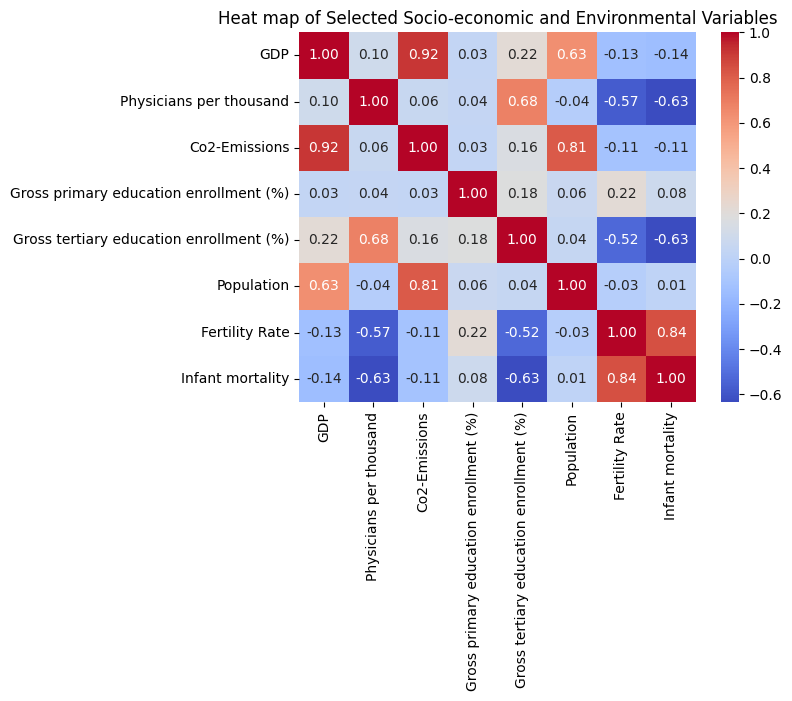

In [29]:
#Visualisze heat map of selected features
import seaborn as sns
import matplotlib.pyplot as plt
socio_economic_features = ['GDP','Physicians per thousand','Infant mortality','Life expectancy','Co2-Emissions','Gross primary education enrollment (%)',
'Gross tertiary education enrollment (%)','Population', 'Fertility Rate', 'Infant mortality']
socio_economic_features=data[features]
feat_cormat=socio_economic_features.corr()
feat_cormat
#plot heat map
sns.heatmap(feat_cormat, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Heat map of Selected Socio-economic and Environmental Variables')
plt.show()


Text(0.5, 1.0, 'Plot of Gross primary enrollment(%) against Gross tertiary enrollment(%) based on Life expectancy')

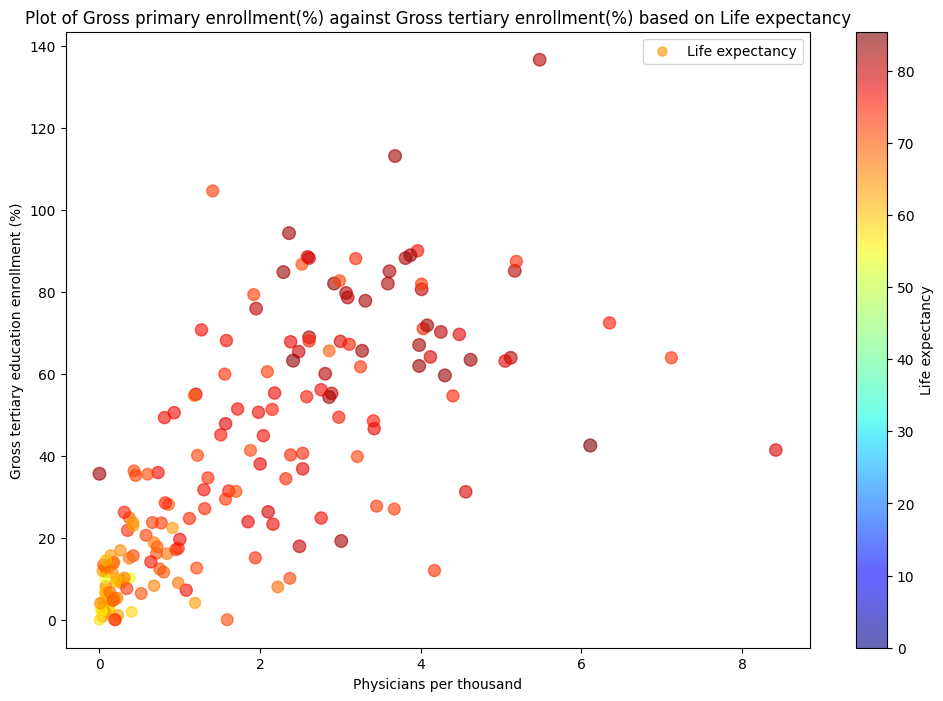

In [30]:
#Bubble plot of multi-dimensional relationship with Life expectancy
data.plot(kind="scatter",x="Physicians per thousand", alpha=0.6,y="Gross tertiary education enrollment (%)",s=data["Life expectancy"],label="Life expectancy",c="Life expectancy",cmap=plt.get_cmap("jet"),colorbar=True, figsize=(12,8))
plt.legend()
plt.title('Plot of Gross primary enrollment(%) against Gross tertiary enrollment(%) based on Life expectancy')

In [31]:
#Scale features
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
data_scaled=scaler.fit_transform(data)
data=pd.DataFrame(data_scaled)
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.723191,-0.150048,-1.691115,0.904519,-0.017705,0.510345,1.243586,-0.823602,-0.408509,-0.197969,...,2.378516,-0.886793,-0.007879,-0.366147,-0.590703,1.493800,0.938301,-0.160541,0.625888,0.716706
1,-1.705426,-0.127295,-1.655472,0.238996,-0.343732,-0.363761,-0.753360,-0.011461,1.333258,-0.203001,...,1.288950,-0.340634,-0.251604,-0.043848,0.494097,-0.077208,1.169786,-0.268816,0.928022,0.000597
2,-1.687661,-0.171283,-0.889151,-0.901265,0.886679,0.493642,0.451943,-0.451629,-1.652628,-0.026045,...,-0.170562,-0.031935,0.026832,-0.731104,2.663696,1.254537,1.049260,0.131516,0.378575,-0.278195
3,-1.669897,-0.097464,-1.726758,0.101455,-0.358520,-0.388815,-1.194983,0.053634,-1.599308,-0.207948,...,0.250061,0.923843,-0.270839,-2.683857,-1.675502,-1.729474,-1.189064,-0.291410,0.984684,-0.280271
4,-1.652132,-0.167239,-1.619829,0.434216,0.293151,-0.063113,2.038121,-0.355536,-0.088592,-0.166316,...,0.098028,-0.928349,-0.050937,0.989405,-0.602367,0.487091,0.129060,-0.009034,-1.264666,-0.033963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.652132,-0.164205,1.481096,-0.586251,0.118159,0.566020,-0.165172,-0.932094,-0.959476,-0.008809,...,0.726429,0.086795,-0.073860,0.145739,-1.675502,1.579573,0.494462,0.046133,-0.526465,-1.306220
191,1.669897,-0.021622,1.498918,0.070397,-0.185570,1.064316,-0.274132,-0.851500,-0.568467,0.025851,...,0.609871,-0.566222,0.396768,0.984665,0.552419,-0.032064,-0.804531,0.182925,-0.206726,1.327761
192,1.687661,-0.152070,1.552382,0.305549,-0.082683,-0.277464,1.046880,1.885601,0.977796,-0.195613,...,2.510277,-0.868984,-0.069384,-0.882774,-1.675502,-0.528647,1.280745,-0.146118,-0.144140,0.427598
193,1.705426,-0.167744,1.588025,-0.249053,0.034789,-0.344275,1.600355,-0.305940,-0.070819,-0.202265,...,-0.200969,-0.346571,-0.147660,0.851954,0.214148,-1.025229,0.997607,-0.186441,-1.345545,0.116294


In [32]:
#Rename columns after scaling
data=data.rename(index=str,columns={0:'Country',1: 'Density\n(P/Km2)', 2:'Abbreviation', 3:'Agricultural Land(%)',
       4:'Land Area(Km2)', 5:'Armed Forces size', 6:'Birth Rate', 7:'Calling Code',
       8:'Capital/Major City', 9:'Co2-Emissions', 10:'CPI', 11:'CPI Change (%)',
       12:'Currency-Code', 13:'Fertility Rate',14: 'Forested Area (%)',
       15:'Gasoline Price', 16:'GDP', 17:'Gross primary education enrollment (%)',
       18:'Gross tertiary education enrollment (%)',19: 'Infant mortality',
       20:'Largest city', 21:'Life expectancy', 22:'Maternal mortality ratio',
       23:'Minimum wage', 24:'Official language', 25:'Out of pocket health expenditure',
       26:'Physicians per thousand', 27:'Population',
       28:'Population: Labor force participation (%)',29:'Tax revenue (%)',
       30:'Total tax rate', 31:'Unemployment rate', 32:'Urban_population', 33:'Latitude',
       34:'Longitude'})

In [33]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,-1.723191,-0.150048,-1.691115,0.904519,-0.017705,0.510345,1.243586,-0.823602,-0.408509,-0.197969,...,2.378516,-0.886793,-0.007879,-0.366147,-0.590703,1.493800,0.938301,-0.160541,0.625888,0.716706
1,-1.705426,-0.127295,-1.655472,0.238996,-0.343732,-0.363761,-0.753360,-0.011461,1.333258,-0.203001,...,1.288950,-0.340634,-0.251604,-0.043848,0.494097,-0.077208,1.169786,-0.268816,0.928022,0.000597
2,-1.687661,-0.171283,-0.889151,-0.901265,0.886679,0.493642,0.451943,-0.451629,-1.652628,-0.026045,...,-0.170562,-0.031935,0.026832,-0.731104,2.663696,1.254537,1.049260,0.131516,0.378575,-0.278195
3,-1.669897,-0.097464,-1.726758,0.101455,-0.358520,-0.388815,-1.194983,0.053634,-1.599308,-0.207948,...,0.250061,0.923843,-0.270839,-2.683857,-1.675502,-1.729474,-1.189064,-0.291410,0.984684,-0.280271
4,-1.652132,-0.167239,-1.619829,0.434216,0.293151,-0.063113,2.038121,-0.355536,-0.088592,-0.166316,...,0.098028,-0.928349,-0.050937,0.989405,-0.602367,0.487091,0.129060,-0.009034,-1.264666,-0.033963


# MODEL SELECTION

## Gradient Boosting Model

In [34]:
#Import necessary models from  scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Select relevant features

features = ['GDP','Physicians per thousand', 'Co2-Emissions','Gross primary education enrollment (%)',
'Gross tertiary education enrollment (%)','Population', 'Fertility Rate', 'Infant mortality']
target = 'Life expectancy'

# Split the data into predictors (X) and target (y)
X = data[features]
y = data[target]

# Train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



When prompted by the author, Open AI's ChatGPT responded with Python codes below( 2024 August 18 , unreferenced)

In [35]:
#Import functions to evaluate model's performance
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Initiate the linear model
linear_regressor = LinearRegression()

#Train and predict
linear_regressor.fit(X_train_scaled, y_train)
y_pred_train = linear_regressor.predict(X_train_scaled)
y_pred_lr = linear_regressor.predict(X_test_scaled)

#Evaluate the model's performance on train set
mse_lr = mean_squared_error(y_train, y_pred_train)
r2_lr = r2_score(y_train, y_pred_train)
rmse = np.sqrt(mse_lr)
mae=mean_absolute_error(y_train, y_pred_train)
#Evaluate the model's performance on test set
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
r2_lr_test = r2_score(y_test, y_pred_lr)
rmse_test = np.sqrt(mse_lr)
mae_test=mean_absolute_error(y_test, y_pred_lr)
print(f" MSE on test set: {mse_lr_test}")
print(f"R^2 Score on test set: {r2_lr_test}")
print(f"RMSE on test set: {rmse_test}")
print(f"Mean absolute error on test set:{mae_test}")
print(f"MSE on train set: {mse_lr}")
print(f"R^2 Score on train set: {r2_lr}")
print(f"RMSE on train set: {rmse}")
print(f"Mean absolute error on train set:{mae}")


 MSE on test set: 0.2983709873739401
R^2 Score on test set: 0.7532288758542984
RMSE on test set: 0.6703847179226295
Mean absolute error on test set:0.38072528417079765
MSE on train set: 0.44941567002420363
R^2 Score on train set: 0.5057480524588378
RMSE on train set: 0.6703847179226295
Mean absolute error on train set:0.43490707549993896


In [36]:
#Estimate variables and coefficients
coefficients = linear_regressor.coef_
intercept = linear_regressor.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)
coef_dict = {col: coef for col, coef in zip(X.columns, coefficients)}
print("Coefficients with variable names:", coef_dict)

Intercept: 0.03332318624855305
Coefficients: [ 0.00861687  0.10400388 -0.04505228  0.37061392  0.44946829  0.05108163
  0.3670588  -0.24889747]
Coefficients with variable names: {'GDP': 0.008616867138569958, 'Physicians per thousand': 0.10400387612776213, 'Co2-Emissions': -0.045052276706430416, 'Gross primary education enrollment (%)': 0.37061391995242526, 'Gross tertiary education enrollment (%)': 0.44946828517801374, 'Population': 0.05108163054389772, 'Fertility Rate': 0.36705879674068664, 'Infant mortality': -0.248897467732336}


Text(0.5, 1.0, ' Density plots  in the Multiple Linear regression Model with socio-economic and environmental features')

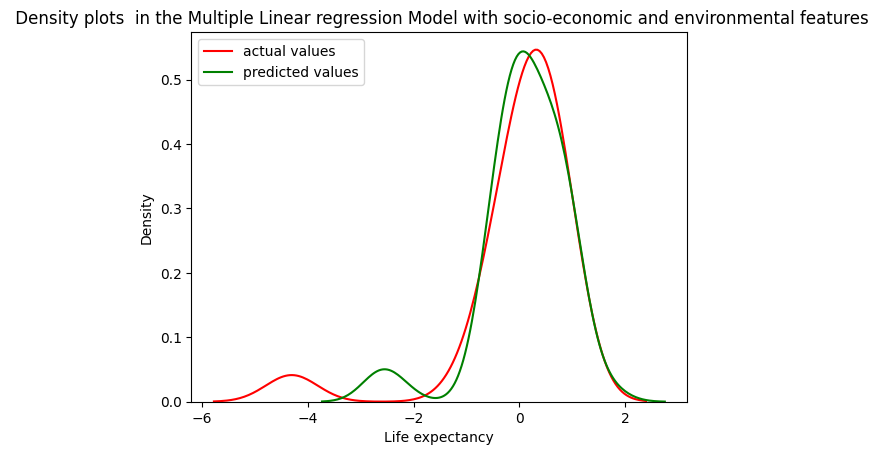

In [37]:
plt.figure()
ax1=sns.distplot(y_test,hist=False,color='r', label='actual values')
sns.distplot(y_pred_lr, hist=False, color="g", label="predicted values")
plt.legend()
plt.title(' Density plots  in the Multiple Linear regression Model with socio-economic and environmental features')

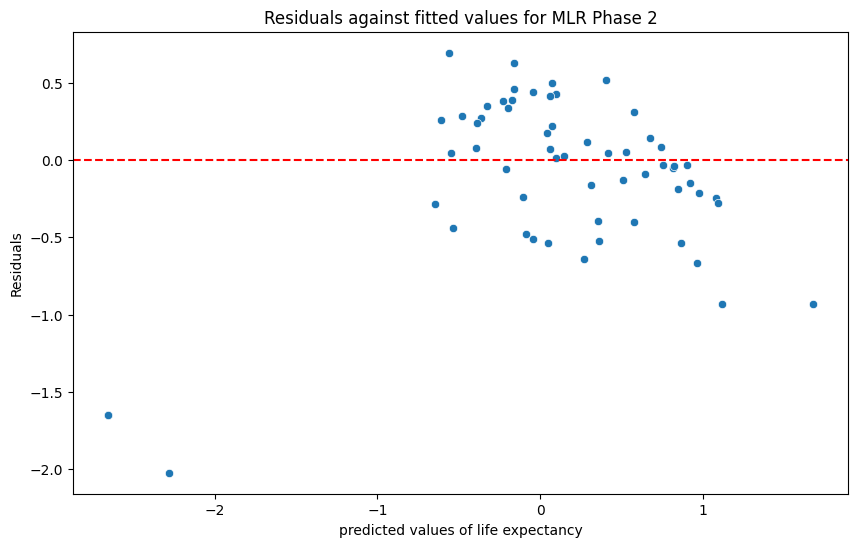

In [38]:
#Visualize residual plots for Multiple Linear Regression Model
train_Residuals=y_train-y_pred_train
test_Residuals=y_test-y_pred_lr
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_lr,y=test_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values for MLR Phase 2')
plt.axhline(y=0, color='red', linestyle='--')

In [39]:
#Generate Multiple Linear Regression Summary on training set
import statsmodels.api as sm
X_sm=sm.add_constant(X_train_scaled)
sm_mod=sm.OLS(y_train, X_sm).fit()
print(sm_mod.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     16.24
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           2.33e-16
Time:                        13:49:52   Log-Likelihood:                -138.59
No. Observations:                 136   AIC:                             295.2
Df Residuals:                     127   BIC:                             321.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [40]:
#View t-values
sm_mod.tvalues

,0
const,0.556621
GDP,0.057429
Physicians per thousand,1.041820
Co2-Emissions,-0.229293
Gross primary education enrollment (%),5.613669
Gross tertiary education enrollment (%),4.461253
Population,0.500240
Fertility Rate,3.198249
Infant mortality,-1.936267


In [41]:
#Generate Multiple Linear Regression Summary on test set
import statsmodels.api as sm
X_sm=sm.add_constant(X_test_scaled)
sm_mod_test=sm.OLS(y_test, X_sm).fit()
print(sm_mod_test.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     42.64
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.02e-19
Time:                        13:49:52   Log-Likelihood:                -28.636
No. Observations:                  59   AIC:                             75.27
Df Residuals:                      50   BIC:                             93.97
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [42]:
#INSTALLING SHAP
%pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.7 MB/s eta 0:00:00


In [43]:
#Initiate shap
explain_lin=shap.Explainer(linear_regressor , X_test_scaled)
shap_val_lin=explain_lin(X_test_scaled)

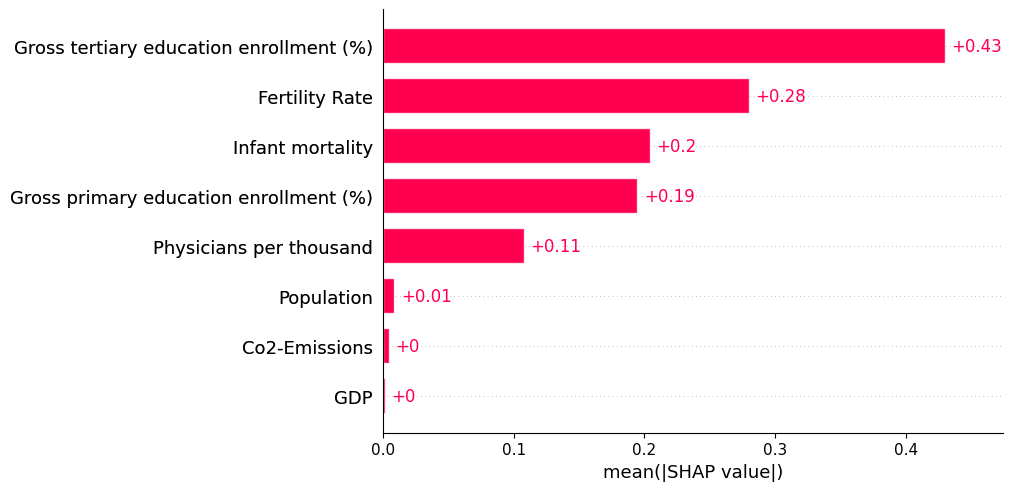

In [44]:
#visualise plot
shap.plots.bar(shap_val_lin)

Text(0.5, 1.0, ' Density plots  in the Multiple linear  regression Model with socio-economic and environmental features')

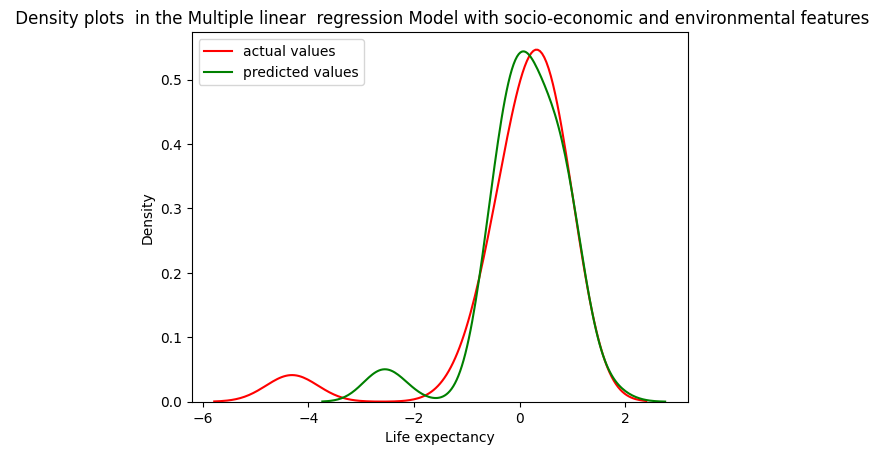

In [45]:
plt.figure()
ax1=sns.distplot(y_test,hist=False,color='r', label='actual values')
sns.distplot(y_pred_lr, hist=False, color="g", label="predicted values")
plt.legend()
plt.title(' Density plots  in the Multiple linear  regression Model with socio-economic and environmental features')

## Gradient boosting Model

In [46]:
#Import necessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Generate X and y
features = ['GDP', 'Physicians per thousand', 'Co2-Emissions','Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)','Urban_population', 'Fertility Rate', 'Infant mortality']
target = 'Life expectancy'

X = data[features]
y = data[target]

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Set parameters for Gradient boosting model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Fit to training data
gbr.fit(X_train, y_train)

#Predict Life expectancy
y_pred = gbr.predict(X_test)

#Generate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f'rmse:{rmse}')

Mean Squared Error: 0.057750789432186346
R-squared: 0.9519877280530967
rmse:0.240313939321435


When prompted by the author, Open AI's ChatGPT responded with Python codes on hyperparameter tuning on Gradient boosting( 2024 July 19  , unreferenced)

In [47]:
#hyperparameter tuning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

#Set the parameters
param_grid = {'alpha':[0.8,0.9,1.0],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#Fit to training set
grid_search.fit(X_train, y_train)

#Evaluate best paremeter
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)
#Make predictions with best estimator
y_train_predict_grd = best_gb_model.predict(X_train)
y_test_predict_grd = best_gb_model.predict(X_test)

#Calculate metrics
metrics_best_gb = {
    'MAE score Train': mean_absolute_error(y_train, y_train_predict_grd),
    'MAE score Test': mean_absolute_error(y_test, y_test_predict_grd),
    'RMSE score Train': np.sqrt(mean_squared_error(y_train, y_train_predict_grd)),
    'RMSE score Test': np.sqrt(mean_squared_error(y_test, y_test_predict_grd)),
    'R^2 score Train': r2_score(y_train, y_train_predict_grd),
    'R^2 score Test': r2_score(y_test, y_test_predict_grd)
}


print(metrics_best_gb)
print('best estimator',best_gb_model)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'MAE score Train': 0.1095767899812327, 'MAE score Test': 0.1668833925219156, 'RMSE score Train': 0.15622192518967548, 'RMSE score Test': 0.21315365967583713, 'R^2 score Train': 0.9742759957413873, 'R^2 score Test': 0.9622271356391813}
best estimator GradientBoostingRegressor(alpha=0.8, learning_rate=0.01, max_depth=5,
                          n_estimators=200, random_state=42)


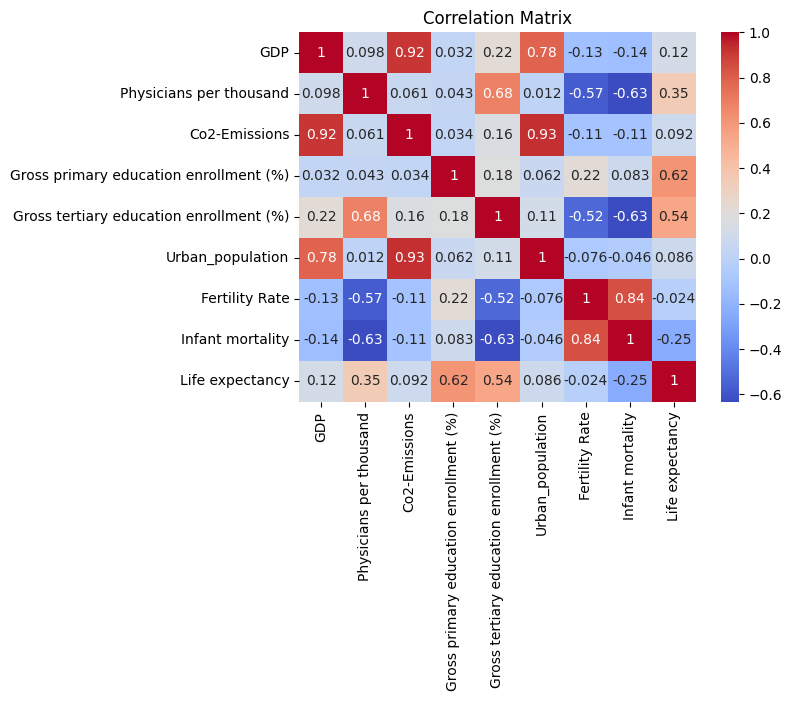

In [48]:
#[3]
import seaborn as sns
import matplotlib.pyplot as plt

#Generate Correlation matrix
corr_matrix = data[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



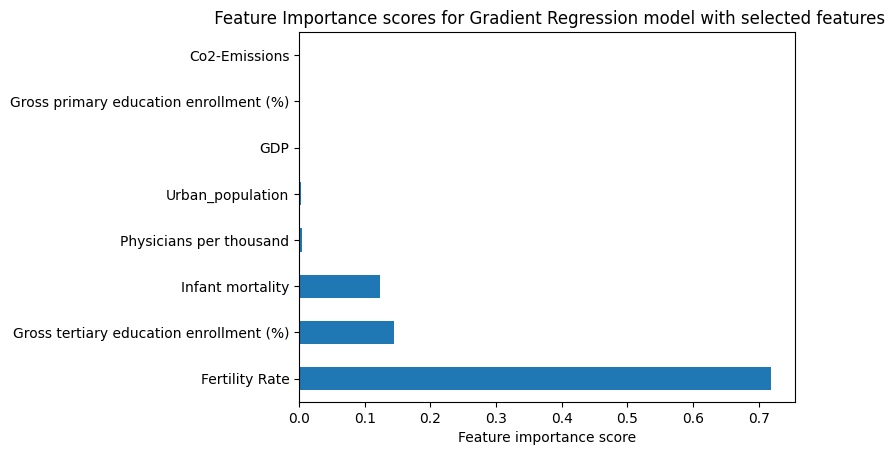

In [49]:
#Fit the model
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5,alpha=0.8, random_state=42)
gbr.fit(X_train, y_train)

#plot feature importance barplot
importances = best_gb_model.feature_importances_
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title(" Feature Importance scores for Gradient Regression model with selected features")
plt.xlabel('Feature importance score')
plt.show()



When prompted by the author, Open AI's ChatGPT responded with Python codes for Random Forest Models( 2024 August 18 , unreferenced)

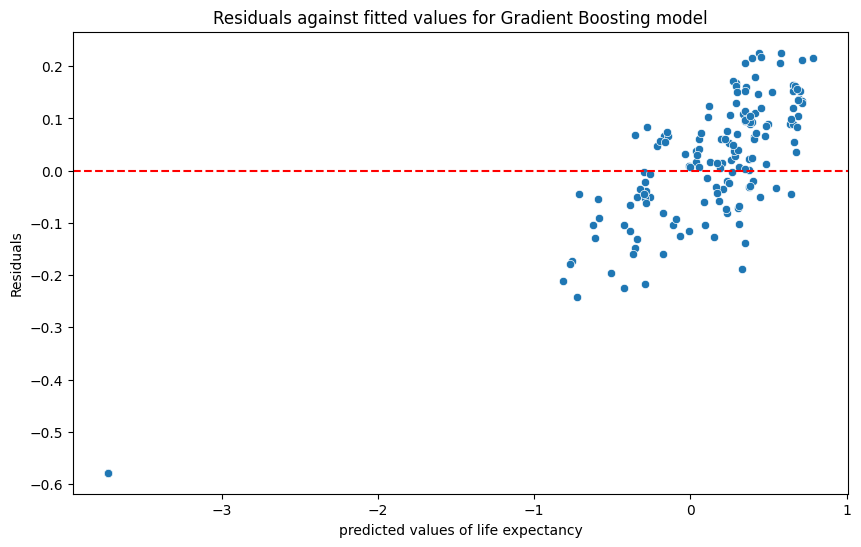

In [50]:
#Visualize Residual plots for gradient boosting model
train_Residuals=y_train-y_train_predict_grd
test_Residuals=y_test-y_test_predict_grd
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_predict_grd,y=train_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values for Gradient Boosting model')
plt.axhline(y=0, color='red', linestyle='--')

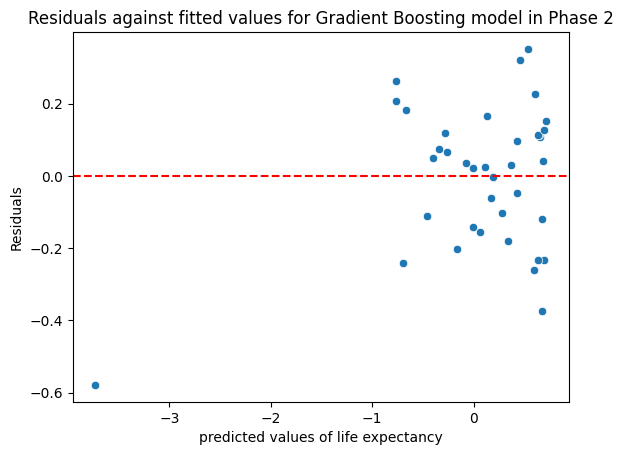

In [51]:
sns.scatterplot(x=y_test_predict_grd,y=test_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values for Gradient Boosting model in Phase 2')
plt.axhline(y=0, color='red', linestyle='--')

## Random Forest Model

In [52]:
#Import the model and evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Select predictor and response
features = ['GDP', 'Physicians per thousand', 'Co2-Emissions','Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)','Urban_population', 'Fertility Rate', 'Infant mortality']
target = 'Life expectancy'

X = data[features]
y = data[target]

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize model
rf = RandomForestRegressor(n_estimators=10, random_state=42)

#Fit on training set
rf.fit(X_train, y_train)

#Predict Target Variable
y_pred = rf.predict(X_test)

#Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

#For training set
y_train_pred = rf.predict(X_train)

#Calculate metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r_squared = r2_score(y_train, y_train_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")

#Print the results
print("Training Set Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Mean Squared Error: {train_mse}")
print(f"Root Mean Squared Error: {train_rmse}")
print(f"R-squared: {train_r_squared}")

Mean Absolute Error: 0.19214462856247674
Mean Squared Error: 0.09652372477915724
Root Mean Squared Error: 0.31068267537659267
R-squared: 0.9201689538244853
Training Set Metrics:
Mean Absolute Error: 0.10479122119993593
Mean Squared Error: 0.06722421815042932
Root Mean Squared Error: 0.2592763355002329
R-squared: 0.9260691093815393


In [53]:
#View the parameters of the model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [54]:
#[1]
#Create function to generate evaluation metrics
def get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict):
    dict_metrics = {
                'MAE score Train' : round(metrics.mean_absolute_error(y_train, y_train_predict), 6),
                'MAE score Test' : round(metrics.mean_absolute_error(y_test, y_test_predict), 6),
                'RMSE score Train' : round(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)), 6),
                'RMSE score Test' : round(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)), 6),
                'R^2 score Train' : round(metrics.r2_score(y_train, y_train_predict), 6),
                'R^2 score Test' : round(metrics.r2_score(y_test, y_test_predict), 6)
                }
    return dict_metrics

In [92]:
#Initialize hyperparameter tuning to find best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#Initialize Hyperparameter grid
param_grid = {'n_estimators' : [5,10,15,20], # Number of trees
              'min_samples_split': [2, 5, 7, 10], # Minimum number of samples to split
              'max_depth': ['None',5, 10, 20, 30, 50], # Maximum tree depth
              'min_samples_leaf' : [1, 2, 3, 4], # Minimum number of objects in a sheet
              'max_features' : ['auto','sqrt', 'log2'],
              'bootstrap': [True, False]}# Maximum number of features that will be used by each of the trees

rf = RandomForestRegressor()
#Initiate gridsearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,verbose=2)

#Estimate the best parameters
grid_search.fit(X_train, y_train)


#Predict life expectancy with best model
best_rf = grid_search.best_estimator_
y_train_predict = best_rf.predict(X_train)
y_test_predict = best_rf.predict(X_test)


metrics_rf_grid = get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict)
metrics_rf_grid

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


{'MAE score Train': 0.177723,
 'MAE score Test': 0.210876,
 'RMSE score Train': 0.38247,
 'RMSE score Test': 0.372082,
 'R^2 score Train': 0.839122,
 'R^2 score Test': 0.885497}

In [56]:
#View best parameters
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [93]:
from sklearn.ensemble import RandomForestRegressor


# Get feature importances
importances = best_rf.feature_importances_

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                  Variable  Importance
4  Gross tertiary education enrollment (%)    0.360161
6                           Fertility Rate    0.304587
2                            Co2-Emissions    0.097527
1                  Physicians per thousand    0.096602
7                         Infant mortality    0.084939
0                                      GDP    0.033052
5                         Urban_population    0.017402
3   Gross primary education enrollment (%)    0.005730


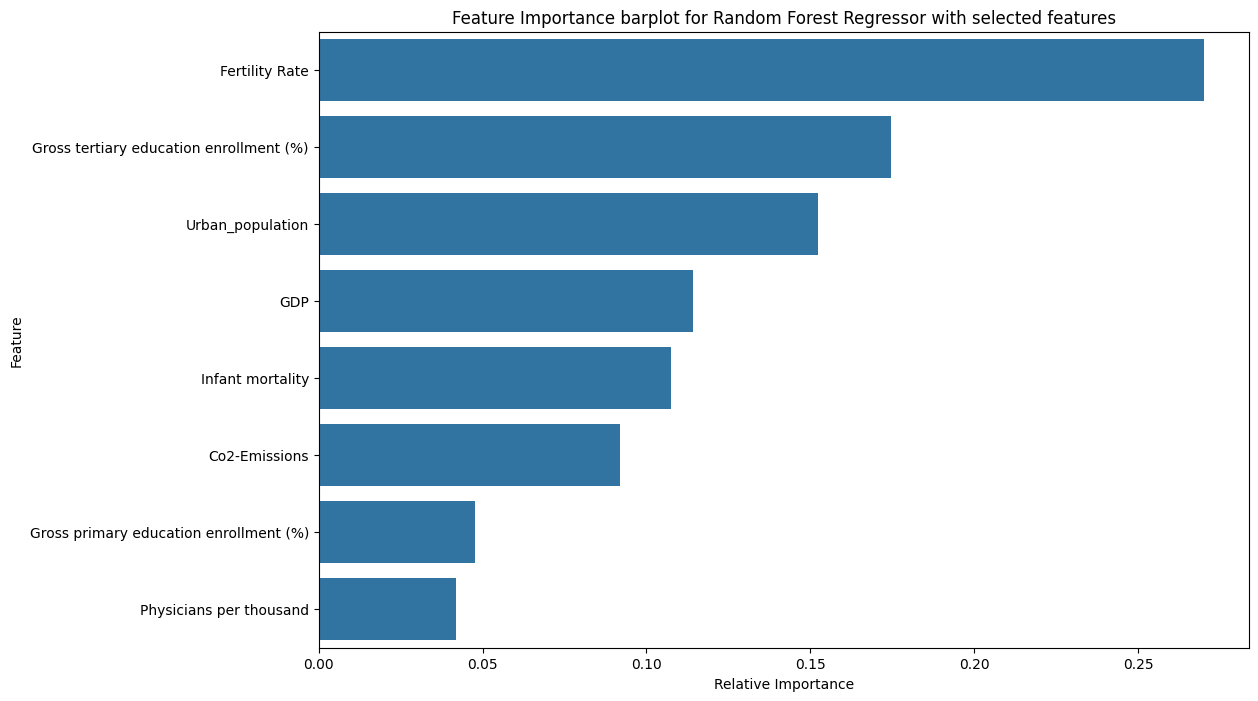

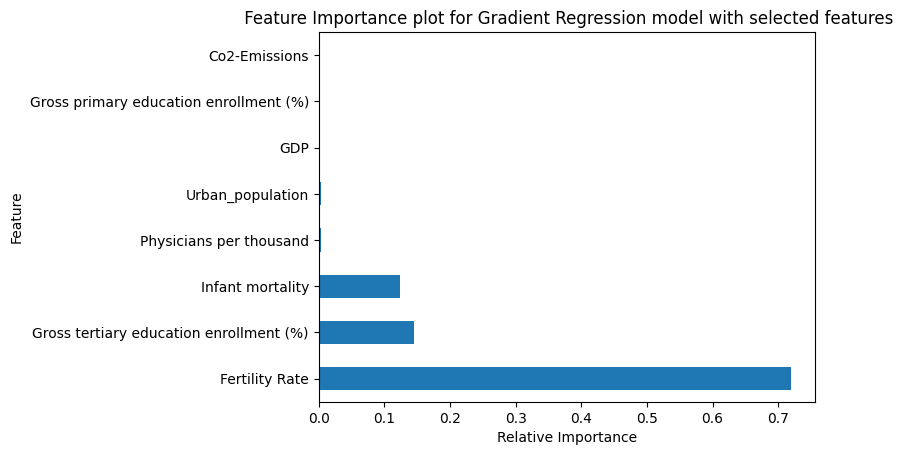

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#extract name of features
feature_names = X_train.columns

#Generate feature importance
importances = best_rf.feature_importances_

#Create indices for sorting
indices = np.argsort(importances)[::-1]

#Sort feature names
sorted_feature_names = [feature_names[i] for i in indices]
#Sort feature importance in descending order
sorted_importances = importances[indices]

#Visualise bar plots
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.title('Feature Importance barplot for Random Forest Regressor with selected features')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

from sklearn.ensemble import GradientBoostingRegressor

#Fit the model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5,alpha=0.8, random_state=42)
gbr.fit(X_train, y_train)

#plot heat map
importances = best_gb_model.feature_importances_
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(8).plot(kind='barh')
plt.title(" Feature Importance plot for Gradient Regression model with selected features")
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


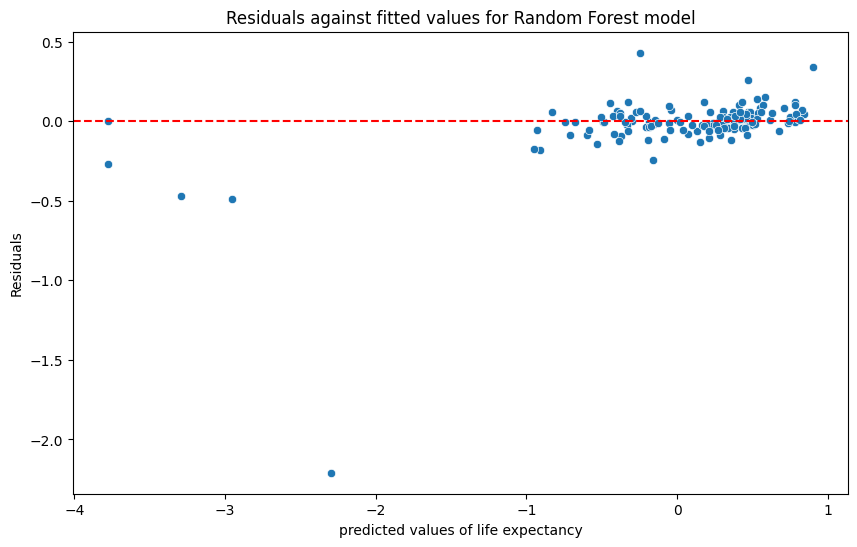

In [59]:
#Visualize Residual plots for Random Forest Model for training set
train_Residuals=y_train-y_train_predict
test_Residuals=y_test-y_test_predict
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred,y=train_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values for Random Forest model')
plt.axhline(y=0, color='red', linestyle='--')

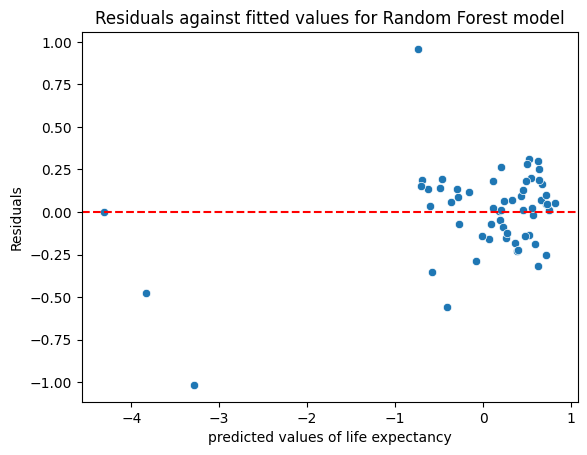

In [60]:
#Visualize Residual plots for Random Forest Model for test set
sns.scatterplot(x=y_test_predict,y=test_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values for Random Forest model')
plt.axhline(y=0, color='red', linestyle='--')

## Ridge Regression Model

In [61]:
#Import Ridge Regression model and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
#select predictor and response variables
X = data[features]
y = data[target]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Initialize the Ridge Regression model
ridge = Ridge(alpha=0.5)

#Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)
y_train_pred=ridge.predict(X_train)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
#Calculate metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r_squared = r2_score(y_train, y_train_pred)
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean abs Error: {test_mae}")

# Print the results
print(f" train Mean Squared Error: {train_mse}")
print(f" train R-squared: {train_r_squared}")
print(f"Train Root Mean Squared Error: {train_rmse}")
print(f" train Mean abs Error: {train_mae}")


Mean Squared Error: 0.2992035137218378
R-squared: 0.7525403254541412
Root Mean Squared Error: 0.5469949850975215
Mean abs Error: 0.37867192840006025
 train Mean Squared Error: 0.4492552024619136
 train R-squared: 0.5059245291828798
Train Root Mean Squared Error: 0.6702650240478862
 train Mean abs Error: 0.43419981919789036


In [62]:
#Initialize hyperparameter tuning
alpha_range = np.linspace(1, 100, 50)
ridge = Ridge()
#estimate cross validated r squared
cv_scores_r2 = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
mean_cv_score_r2 = cv_scores_r2.mean()
print(f"Mean Cross-Validation R-squared Score for Ridge Regression: {mean_cv_score_r2:.4f}")
#Estimate cross validated mean squared error
cv_scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score_mse = -cv_scores_mse.mean()
print(f"Mean Cross-Validation Mean Squared Error for Ridge Regression: {mean_cv_score_mse:.4f}")
#Estimate best alpha
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f"Optimal Alpha: {best_alpha}")
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)
y_pred = ridge_best.predict(X_test)

y_train_pred = ridge_best.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
#Evaluate model's performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r_squared = r2_score(y_train, y_train_pred)

#Print the results
print(f"Test MSE: {mse}")
print(f"Test R-squared: {r_squared}")
print(f"Root Mean Squared Error: {rmse}")
print(f" test Mean abs Error: {test_mae}")

#Print the results
print(f" train Mean Squared Error: {train_mse}")
print(f" train R-squared: {train_r_squared}")
print(f"train Root Mean Squared Error: {train_rmse}")
print(f" train Mean abs Error: {train_mae}")



Mean Cross-Validation R-squared Score for Ridge Regression: -0.3741
Mean Cross-Validation Mean Squared Error for Ridge Regression: 0.6107
Optimal Alpha: 7.061224489795918
Test MSE: 0.3177174615090968
Test R-squared: 0.7372281540260563
Root Mean Squared Error: 0.5636643163347285
 test Mean abs Error: 0.37867192840006025
 train Mean Squared Error: 0.4520042066046673
 train R-squared: 0.5029012686648797
train Root Mean Squared Error: 0.6723125810251265
 train Mean abs Error: 0.42385843337457546


In [63]:
#Generate best MSE value
best_cv_mse = -grid_search.best_score_
print(f"Best Cross-Validated MSE: {best_cv_mse}")

Best Cross-Validated MSE: 0.5888534989505979


In [64]:
#Estimate coefficient and intercept of the model
print("The intercepts are: ",ridge_best.coef_)
print("The coefficient is",ridge_best.intercept_)

The intercepts are:  [-0.00255244  0.11553778 -0.02981977  0.36500301  0.41384882  0.04396605
  0.28932308 -0.1831389 ]
The coefficient is 0.03348349834897627


In [65]:
coef_Ridge=ridge_best.coef_

In [66]:
#Assign coefficient to corresponding name
predictor_names=X.columns
predictor_names

Index(['GDP', 'Physicians per thousand', 'Co2-Emissions',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Urban_population',
       'Fertility Rate', 'Infant mortality'],
      dtype='object')

In [94]:
#Create a dictionary of predictors and coefficients
predictor_coefficients = dict(zip(predictor_names, coef_Ridge))

In [68]:
for feature, coef in predictor_coefficients.items():
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: GDP, Coefficient: -0.0025524359979817576
Feature: Physicians per thousand, Coefficient: 0.11553777525139826
Feature: Co2-Emissions, Coefficient: -0.029819766941953867
Feature: Gross primary education enrollment (%), Coefficient: 0.3650030067856287
Feature: Gross tertiary education enrollment (%), Coefficient: 0.4138488232427148
Feature: Urban_population, Coefficient: 0.043966053619849
Feature: Fertility Rate, Coefficient: 0.2893230810780737
Feature: Infant mortality, Coefficient: -0.1831388952803345


In [69]:
#create tabe and save
coefficient_table=pd.DataFrame({
    'Feature':predictor_names,
    'Coefficients':coefficients
})
print(coefficient_table)
#coefficient_table.to_csv('Ridge_coeff_table.csv', index=False)

                                   Feature  Coefficients
0                                      GDP      0.008617
1                  Physicians per thousand      0.104004
2                            Co2-Emissions     -0.045052
3   Gross primary education enrollment (%)      0.370614
4  Gross tertiary education enrollment (%)      0.449468
5                         Urban_population      0.051082
6                           Fertility Rate      0.367059
7                         Infant mortality     -0.248897


Text(0.5, 1.0, ' Density plots for the Ridge regression Model with socio-economic and environmental features')

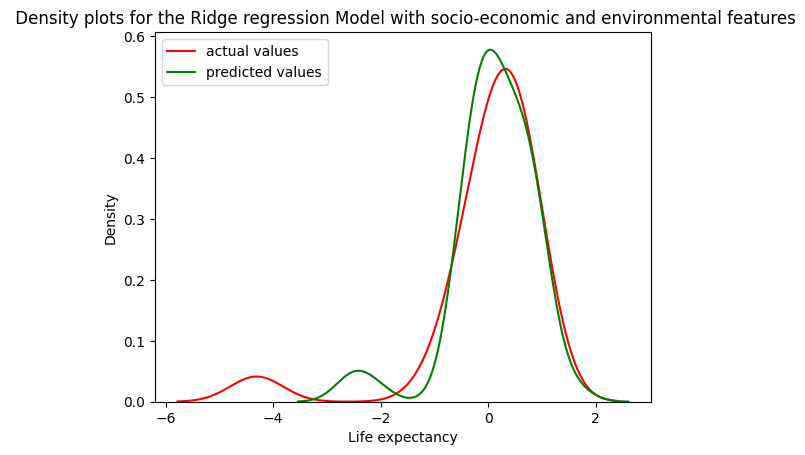

In [70]:
#Visualize Density plots for the Ridge Regression model
plt.figure()
ax1=sns.distplot(y_test,hist=False,color='r', label='actual values')
sns.distplot(y_pred, hist=False, color="g", label="predicted values")
plt.legend()
plt.title(' Density plots for the Ridge regression Model with socio-economic and environmental features')

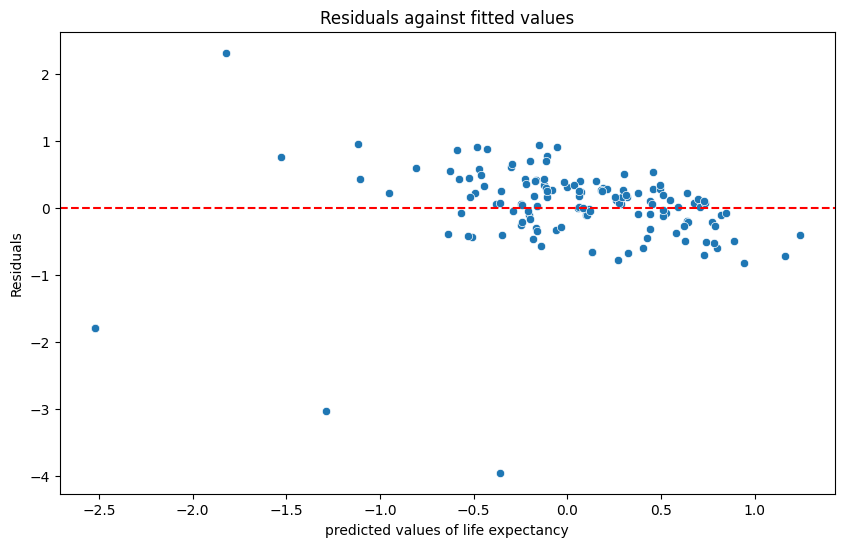

In [71]:
#Visualize Residual plots for Ridge Regression Model
train_Residuals=y_train-y_train_pred
test_Residuals=y_test-y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred,y=train_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values')
plt.axhline(y=0, color='red', linestyle='--')

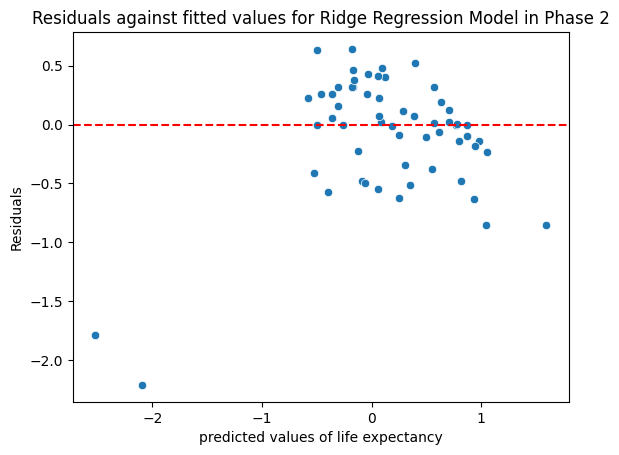

In [72]:
sns.scatterplot(x=y_pred,y=test_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values for Ridge Regression Model in Phase 2')
plt.axhline(y=0, color='red', linestyle='--')

In [73]:
#INSTALLING SHAP
%pip install shap
import shap

In [74]:
#Initiate SHAP explainer to visualize features' contribution
explain_ridge=shap.Explainer(ridge_best, X_test,)
shap_val_ridge=explain_ridge(X_test)


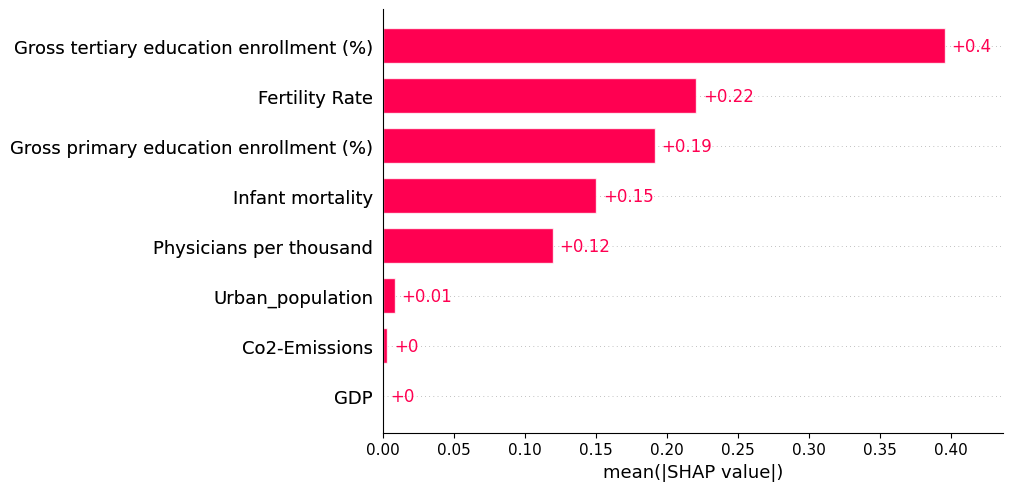

In [75]:
#Visualise  the SHAP plot
shap.plots.bar(shap_val_ridge)


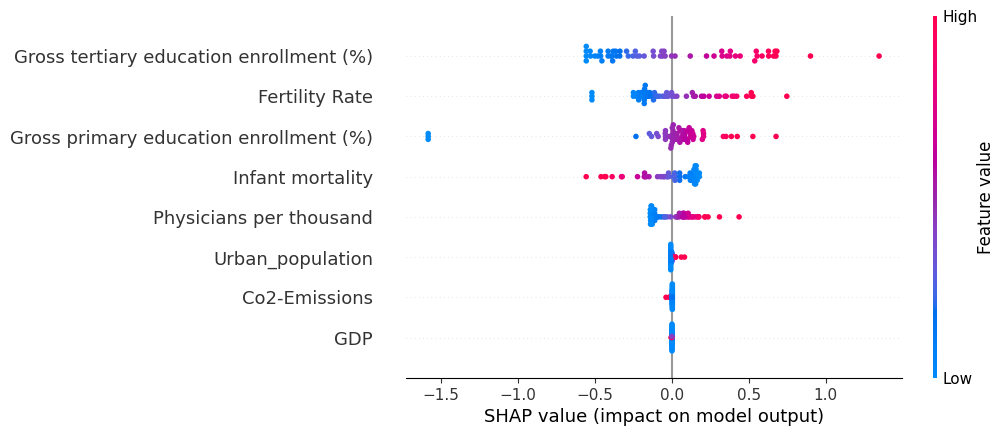

In [76]:
#Use beeswarm to visualize significant features
shap.plots.beeswarm(shap_val_ridge)

## LASSO Model

In [77]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
#Select features
features = ['GDP', 'Physicians per thousand', 'Co2-Emissions','Gross primary education enrollment (%)',
        'Gross tertiary education enrollment (%)','Urban_population', 'Fertility Rate', 'Infant mortality']
target = 'Life expectancy'

X = data[features]
y = data[target]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Lasso Regression model
lasso = Lasso(alpha=0.01)

# Train the model
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)
y_train_pred=lasso.predict(X_train)
#Estimate performance metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)

#performance metrics for test set
mae_train=mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r_squared_train = r2_score(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
# Print the results
print(f"Test Mean Squared Error: {mse}")
print(f"Test R-squared: {r_squared}")
print(f"Test Root Mean Squared Error: {rmse}")
print(f"Test Mean absolute Error: {mae}")
# Print the train results
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared: {r_squared_train}")
print(f"Train Root Mean Squared Error: {rmse_train}")
print(f" Train Mean absolute Error: {mae_train}")
# Coefficients of the model
print(f"Coefficients: {lasso.coef_}")
print(f"Root Mean Squared Error: {rmse}")

Test Mean Squared Error: 0.30976592649436274
Test R-squared: 0.743804561643767
Test Root Mean Squared Error: 0.5565661923746023
Test Mean absolute Error: 0.380588905695005
Train Mean Squared Error: 0.45169309634978333
Train R-squared: 0.5032434170580768
Train Root Mean Squared Error: 0.6720811679773384
 Train Mean absolute Error: 0.428152841924321
Coefficients: [-0.          0.08844978 -0.          0.37294646  0.4478793   0.00540755
  0.29337508 -0.17801858]
Root Mean Squared Error: 0.5565661923746023


In [78]:
#Estimate best alpha value
param_grid = {'alpha': np.logspace(-6, 0, 5)}
#param_grid = {'alpha': np.linspace(0.001,0.1,100)}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f"Optimal Alpha: {best_alpha}")


Optimal Alpha: 0.03162277660168379


In [79]:
#Train the model using best parameter
best_lasso_mod = Lasso(alpha=best_alpha)
best_lasso_mod.fit(X_train, y_train)

#Calculate predited Life expectancy
y_train_pred = best_lasso_mod.predict(X_train)
y_test_pred = best_lasso_mod.predict(X_test)

#Estimate and print evaluation metrics on taining set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training Set R-squared: {train_r2:.6f}")
print(f"Training Set RMSE: {train_rmse:.6f}")
print(f"Training Set MAE: {train_mae:.6f}")

#Estimate evelaution metrics on taining set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test Set R-squared: {test_r2:.6f}")
print(f"Test Set RMSE: {test_rmse:.6f}")
print(f"Test Set MAE: {test_mae:.6f}")


Training Set R-squared: 0.489323
Training Set RMSE: 0.681433
Training Set MAE: 0.422135
Test Set R-squared: 0.712209
Test Set RMSE: 0.589888
Test Set MAE: 0.393313


Text(0.5, 1.0, ' Density plots for the LASSO regression Model with socio-economic and environmental features')

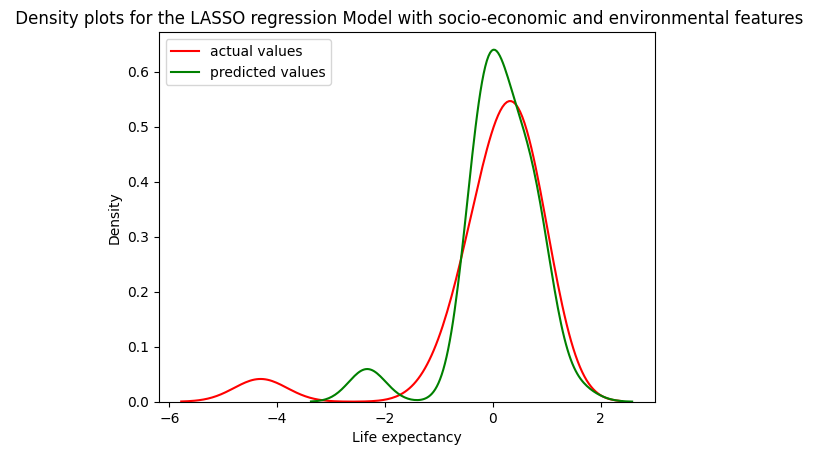

In [80]:
#Visualize Density plot for LASSO Regression Model
plt.figure()
ax1=sns.distplot(y_test,hist=False,color='r', label='actual values')
sns.distplot(y_test_pred, hist=False, color="g", label="predicted values")
plt.legend()
plt.title(' Density plots for the LASSO regression Model with socio-economic and environmental features')


In [81]:
#Estimate coefficients for the predictors
best_lasso_mod.coef_

array([ 0.        ,  0.05843533,  0.        ,  0.37014225,  0.45091892,
        0.        ,  0.15228315, -0.04762703])

In [82]:
#Estimate the intercept of the model
best_lasso_mod.intercept_

0.03466825210203142

In [83]:
#Create dictionary of variables and coefficients
predictor_coef = dict(zip(predictor_names, best_lasso_mod.coef_))

In [84]:
#Assign features to corresponding coefficients
for feature, coef in predictor_coef.items():
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: GDP, Coefficient: 0.0
Feature: Physicians per thousand, Coefficient: 0.0584353328012594
Feature: Co2-Emissions, Coefficient: 0.0
Feature: Gross primary education enrollment (%), Coefficient: 0.37014225297557923
Feature: Gross tertiary education enrollment (%), Coefficient: 0.4509189157902111
Feature: Urban_population, Coefficient: 0.0
Feature: Fertility Rate, Coefficient: 0.15228315293492692
Feature: Infant mortality, Coefficient: -0.04762703015814771


In [85]:
#Create table of coefficients and save table
coefficient_table_LASSO=pd.DataFrame({
    'Feature':predictor_names,
    'Coefficients':best_lasso_mod.coef_
})
print(coefficient_table_LASSO)
#coefficient_table_LASSO.to_csv('lasso_coeff_table.csv', index=False)

                                   Feature  Coefficients
0                                      GDP      0.000000
1                  Physicians per thousand      0.058435
2                            Co2-Emissions      0.000000
3   Gross primary education enrollment (%)      0.370142
4  Gross tertiary education enrollment (%)      0.450919
5                         Urban_population      0.000000
6                           Fertility Rate      0.152283
7                         Infant mortality     -0.047627


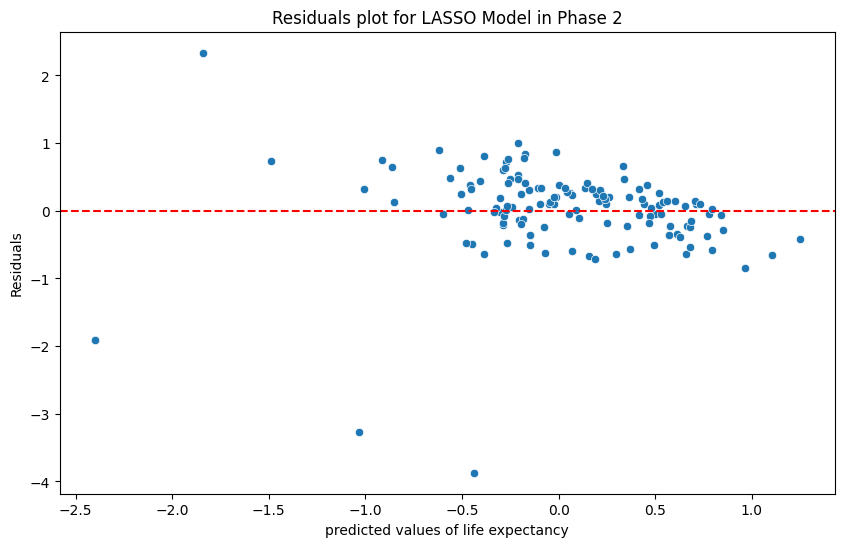

In [86]:
#Residual plots for Ridge Regression Model
train_Residuals=y_train-y_train_pred
test_Residuals=y_test-y_test_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred,y=train_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals plot for LASSO Model in Phase 2')
plt.axhline(y=0, color='red', linestyle='--')

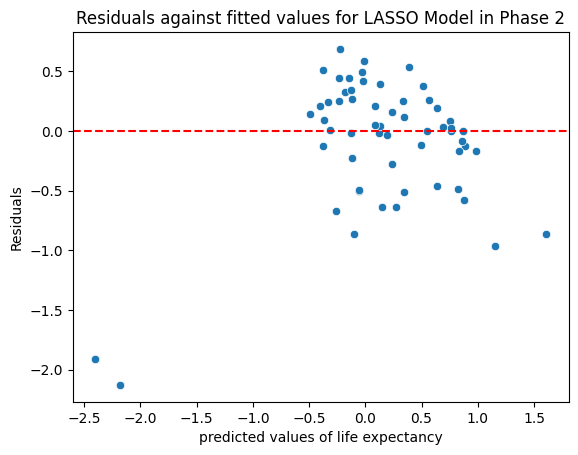

In [87]:
#Visualize residual plots on test set
sns.scatterplot(x=y_test_pred,y=test_Residuals)
plt.xlabel('predicted values of life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals against fitted values for LASSO Model in Phase 2')
plt.axhline(y=0, color='red', linestyle='--')

In [88]:
#Initialize SHAP Explainer to interprete contribution of the features
explain_lasso=shap.Explainer(best_lasso_mod, X_test)
shap_val_lasso=explain_lasso(X_test)

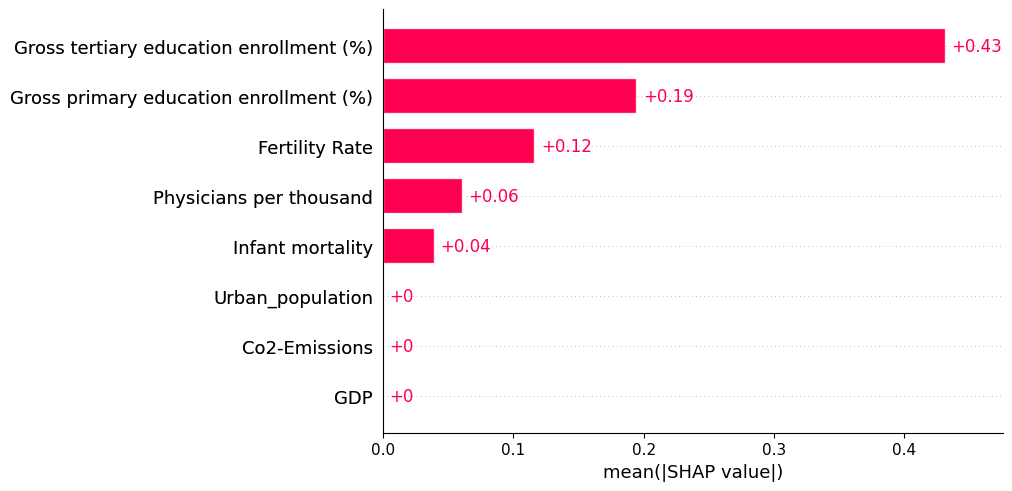

In [89]:
#visualise SHAP Explainer plot
shap.plots.bar(shap_val_lasso)

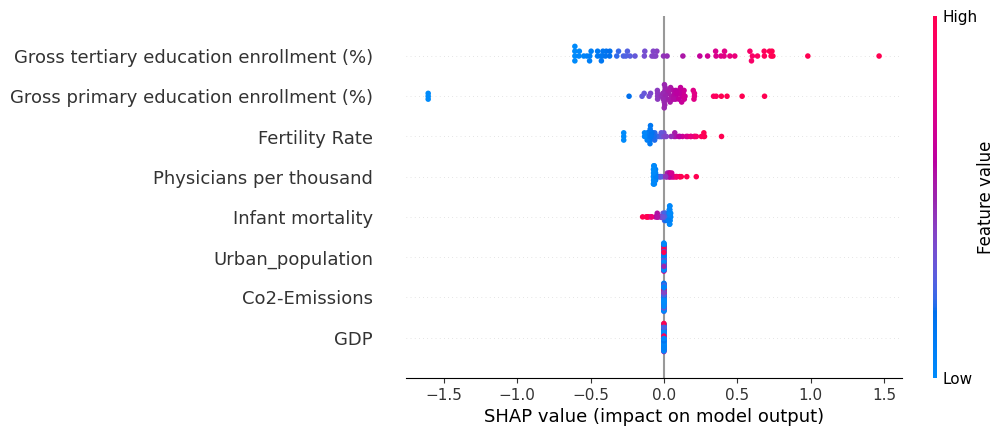

In [91]:
#Use Beeswarm to visualize features' contribution
shap.plots.beeswarm(shap_val_lasso)

References:

1. Vishnnyakov D. Unemployment Rate Prediction[Internet]. Kaggle; 2023[cited 2024 August 9]. Available from:https://www.kaggle.com/code/dmitriyvishnyakov/unemployment-rate-prediction
2. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for splitting dataset into X and y and Test and training set using ChatGPT on 20th July, 2024
3. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating  linear Regression modelling and cross validation using ChatGPT on 20th July, 2024
4. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating  Correlation matrix for Gradient boosting Regressor using ChatGPT on 20th July, 2024
5. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating  Feature Importance for Random Forest Regressor using ChatGPT on 20th July, 2024
6. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating Ridge Regression using ChatGPT on 20th July, 2024
7. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating Lasso Regression using ChatGPT on 18th July, 2024
8. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating Variable importance plots on 16th August, 2024
9. OpenAI. ChatGPT[Internet]. Available from:https://chat/openai.com/. Code for generating Table of coefficients for Ridge regression model on 13th September 2024
